In [ ]:
!sudo apt update
!sudo apt install openjdk-17-jdk -y
!update-alternatives --install /usr/bin/java java /usr/lib/jvm/java-17-openjdk-amd64/bin/java 1
!update-alternatives --set java /usr/lib/jvm/java-17-openjdk-amd64/bin/java

# Verifica que ahora tengas Java 17
!java -version
!pip install language-tool-python

#para revisar gramatica
!pip install language-tool-python

#para tokenizar y lematizar
!pip install -U spacy
!python -m spacy download es_core_news_sm

#para transformers
!pip install transformers sentence-transformers

# Instalación de librerías (solo si usas Colab)
#!pip install transformers datasets evaluate


[sudo] password for lfre: 
[sudo] password for lfre: 

PASO 1

In [1]:
import pandas as pd

# Cargar el dataset desde el mismo directorio donde está el archivo .ipynb
df = pd.read_csv("Nuevo_Dataset_Patrones_Emocionales.csv")

# Mostrar las primeras filas del dataset
df.head()

,Marca temporal,ID Único,Edad:,Género:,Nivel socioeconómico:,Grado de estudios:,"Si tu nivel de estudios es licenciatura, selecciona la carrera a la que perteneces (solo si eres FCC-BUAP):","Si tu nivel de estudios es licenciatura, selecciona el semestre al que perteneces:",Actualmente te encuentras:,Si actualmente trabajas. ¿En qué área trabajas?,...,5. Describe una situación en la que experimentaste algo que te resultó desagradable y quisiste evitar. ¿Cómo fue ese momento?,6. Recuerda una ocasión en la que viste o viviste algo que te pareció totalmente inaceptable. ¿Cómo reaccionaste y qué pensaste al respecto?,7. Piensa en un momento en el que sentiste que alguien fue injusto contigo. ¿Qué ocurrió y cómo reaccionaste?,8. Describe una ocasión en la que te sentiste frustrado(a) porque no tomaron en cuenta tu opinión o esfuerzo. ¿Cómo reaccionaste ante esta situación y cómo la manejaste?,9. Recuerda una ocasión en la que tuviste que enfrentarte a algo incierto o desconocido. ¿Cómo fue la experiencia y qué sentiste en ese momento?,10. Describe un evento en el que sentiste que algo estaba fuera de tu control y no sabías qué hacer. ¿Cómo reaccionaste y qué pasó después?,11. Piensa en un momento en el que ocurrió algo totalmente inesperado en tu vida. ¿Cómo fue y qué pasó después?,12. Recuerda una ocasión en la que recibiste una noticia o viviste un evento que nunca imaginaste. ¿Cómo reaccionaste y qué impacto tuvo en ti?,Universidad a la que pertecenes:,"Si estudias en otra universidad o en una carrera diferente, por favor indica qué carrera estás cursando:"
0,03/12/25 23:03,ECOZ5F5S,29.0,Masculino,Medio,Maestría,NaN,NaN,Ambos,"Sector de la educación - Maestros, educadores,...",...,Una ocasión me sentí muy incómodo porque una c...,Cuando han cometido alguna injusticia hacia al...,"Ocurrió en mi trabajo, tuve un rose con la sec...",Me sentí muy molesto porque yo había trabajado...,La experiencia fue desagradable porque había l...,Fue una ocasión que tenía que presentar mis av...,"Recuerdo mucho cuando perdí a un ser querido, ...",Recuerdo mucho la vez que recibí mi aceptación...,Benemérita Universidad Autónoma de Puebla,NaN
1,03/12/25 23:03,M4QDTQFK,22.0,Femenino,Medio,Licenciatura,Ingeniería en Tecnologías de la Información,8.0,Ambos,Tecnología e informática - Desarrolladores de ...,...,"En segundo semestre reprobé una materia, la re...",Me ha tocado ver injusticias en las aulas de c...,Un profesor de la universidad me hacia sentir ...,Cuando recién entre a la universidad solia hac...,"Cuando aprendí a manejar, el primer dia me met...",En una ocasión trabajado en equipos intentaba ...,"De pronto me propusieron un trabajo, lo acepté...",La situación fue que me enteré que abusaron de...,Benemérita Universidad Autónoma de Puebla,NaN
2,03/12/25 23:14,5QBDZZE1,21.0,Masculino,Medio,Licenciatura,Ingeniería en Tecnologías de la Información,7.0,Estudiando,Estudiante - Para quienes están en institucion...,...,Repugnante no pude ni pesarlo después,Con enojo y trate de analizar bien la situación,Me culparon y llore,No dándole esa importancia y seguí trabajando,Miedo además de que era algo nuevo,Llore y pude manejarlo poco a poco,Falleció mi mascota. Y tuve mucha tristeza,Mucha impresión,Benemérita Universidad Autónoma de Puebla,NaN
3,03/12/25 23:19,2TPBXZ8F,24.0,Masculino,Medio,Licenciatura,Ingeniería en Ciencias de la Computación,9.0,Estudiando,Estudiante - Para quienes están en institucion...,...,Incómodo pero tenía que afrontarlo de la mejor...,Actúe y compartí lo que veía que estaba mal y ...,Tranquilo me enoje un poco pero expresé mi sen...,No le di importancia y lo deje de lado pero tr...,"Emocionante, adrenalina y mucha curiosidad",Relajarme y afrontarlo y dejar que las cosas s...,Sorpresa un poco de ansiedad pero después todo...,Impactado aveces se piensa que las cosas no va...,Benemérita Universidad Autónoma de Puebla,NaN
4,03/12/25 23:20,6MXXTYFP,24.0,Masculino,Bajo,Licenciatura,Ingeniería en Ciencias de la Computación,8.0,Estudian

In [2]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
display(df.head())

# Ver información general del dataset
print("\nInformación del dataset:")
df.info()

# Verificar la cantidad de valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Verificar los nombres de las columnas
print("\nNombres de las columnas:")
print(df.columns.tolist())

Primeras filas del dataset:


,Marca temporal,ID Único,Edad:,Género:,Nivel socioeconómico:,Grado de estudios:,"Si tu nivel de estudios es licenciatura, selecciona la carrera a la que perteneces (solo si eres FCC-BUAP):","Si tu nivel de estudios es licenciatura, selecciona el semestre al que perteneces:",Actualmente te encuentras:,Si actualmente trabajas. ¿En qué área trabajas?,...,5. Describe una situación en la que experimentaste algo que te resultó desagradable y quisiste evitar. ¿Cómo fue ese momento?,6. Recuerda una ocasión en la que viste o viviste algo que te pareció totalmente inaceptable. ¿Cómo reaccionaste y qué pensaste al respecto?,7. Piensa en un momento en el que sentiste que alguien fue injusto contigo. ¿Qué ocurrió y cómo reaccionaste?,8. Describe una ocasión en la que te sentiste frustrado(a) porque no tomaron en cuenta tu opinión o esfuerzo. ¿Cómo reaccionaste ante esta situación y cómo la manejaste?,9. Recuerda una ocasión en la que tuviste que enfrentarte a algo incierto o desconocido. ¿Cómo fue la experiencia y qué sentiste en ese momento?,10. Describe un evento en el que sentiste que algo estaba fuera de tu control y no sabías qué hacer. ¿Cómo reaccionaste y qué pasó después?,11. Piensa en un momento en el que ocurrió algo totalmente inesperado en tu vida. ¿Cómo fue y qué pasó después?,12. Recuerda una ocasión en la que recibiste una noticia o viviste un evento que nunca imaginaste. ¿Cómo reaccionaste y qué impacto tuvo en ti?,Universidad a la que pertecenes:,"Si estudias en otra universidad o en una carrera diferente, por favor indica qué carrera estás cursando:"
0,03/12/25 23:03,ECOZ5F5S,29.0,Masculino,Medio,Maestría,NaN,NaN,Ambos,"Sector de la educación - Maestros, educadores,...",...,Una ocasión me sentí muy incómodo porque una c...,Cuando han cometido alguna injusticia hacia al...,"Ocurrió en mi trabajo, tuve un rose con la sec...",Me sentí muy molesto porque yo había trabajado...,La experiencia fue desagradable porque había l...,Fue una ocasión que tenía que presentar mis av...,"Recuerdo mucho cuando perdí a un ser querido, ...",Recuerdo mucho la vez que recibí mi aceptación...,Benemérita Universidad Autónoma de Puebla,NaN
1,03/12/25 23:03,M4QDTQFK,22.0,Femenino,Medio,Licenciatura,Ingeniería en Tecnologías de la Información,8.0,Ambos,Tecnología e informática - Desarrolladores de ...,...,"En segundo semestre reprobé una materia, la re...",Me ha tocado ver injusticias en las aulas de c...,Un profesor de la universidad me hacia sentir ...,Cuando recién entre a la universidad solia hac...,"Cuando aprendí a manejar, el primer dia me met...",En una ocasión trabajado en equipos intentaba ...,"De pronto me propusieron un trabajo, lo acepté...",La situación fue que me enteré que abusaron de...,Benemérita Universidad Autónoma de Puebla,NaN
2,03/12/25 23:14,5QBDZZE1,21.0,Masculino,Medio,Licenciatura,Ingeniería en Tecnologías de la Información,7.0,Estudiando,Estudiante - Para quienes están en institucion...,...,Repugnante no pude ni pesarlo después,Con enojo y trate de analizar bien la situación,Me culparon y llore,No dándole esa importancia y seguí trabajando,Miedo además de que era algo nuevo,Llore y pude manejarlo poco a poco,Falleció mi mascota. Y tuve mucha tristeza,Mucha impresión,Benemérita Universidad Autónoma de Puebla,NaN
3,03/12/25 23:19,2TPBXZ8F,24.0,Masculino,Medio,Licenciatura,Ingeniería en Ciencias de la Computación,9.0,Estudiando,Estudiante - Para quienes están en institucion...,...,Incómodo pero tenía que afrontarlo de la mejor...,Actúe y compartí lo que veía que estaba mal y ...,Tranquilo me enoje un poco pero expresé mi sen...,No le di importancia y lo deje de lado pero tr...,"Emocionante, adrenalina y mucha curiosidad",Relajarme y afrontarlo y dejar que las cosas s...,Sorpresa un poco de ansiedad pero después todo...,Impactado aveces se piensa que las cosas no va...,Benemérita Universidad Autónoma de Puebla,NaN
4,03/12/25 23:20,6MXXTYFP,24.0,Masculino,Bajo,Licenciatura,Ingeniería en Ciencias de la Computación,8.0,Estudian


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 26 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                      --------------  -----  
 0   Marca temporal                                                                                                                                                              341 non-null    object 
 1   ID Único                                                                                                                                                                    339 non-null    object 
 2   Edad:                                                       

In [3]:
# Calcular estadísticas sobre la longitud de las respuestas por pregunta
columnas_preguntas = [col for col in df.columns if any(col.strip().startswith(f"{i}.") for i in range(1, 13))]
for col in columnas_preguntas:
    print(f"\n--- Estadísticas para la columna: {col} ---")

    df['longitud_palabras'] = df[col].fillna("").apply(lambda x: len(str(x).split()))
    df['longitud_caracteres'] = df[col].fillna("").apply(lambda x: len(str(x)))

    print("Palabras por respuesta:")
    print(df['longitud_palabras'].describe())  # min, max, mean, std, 25%, 50%, 75%

    print("\nCaracteres por respuesta:")
    print(df['longitud_caracteres'].describe())


--- Estadísticas para la columna: 1.  Recuerda un momento en el que lograste algo que realmente deseabas. ¿Cómo fue la experiencia y qué impacto tuvo en tu vida?  ---
Palabras por respuesta:
count    341.000000
mean      23.384164
std       24.353927
min        1.000000
25%        9.000000
50%       17.000000
75%       28.000000
max      176.000000
Name: longitud_palabras, dtype: float64

Caracteres por respuesta:
count     341.000000
mean      133.296188
std       136.201679
min         2.000000
25%        50.000000
50%        96.000000
75%       164.000000
max      1011.000000
Name: longitud_caracteres, dtype: float64

--- Estadísticas para la columna: 2. Describe una ocasión en la que alguien hizo algo especial o inesperado por ti y te hizo sentir bien. ¿Cómo reaccionaste?  ---
Palabras por respuesta:
count    341.000000
mean      21.428152
std       22.840849
min        1.000000
25%        6.000000
50%       14.000000
75%       26.000000
max      144.000000
Name: longitud_palabras

count    341.000000
mean      22.053079
std        3.805974
min       17.000000
25%       20.000000
50%       21.000000
75%       23.000000
max       49.000000
Name: Edad:, dtype: float64


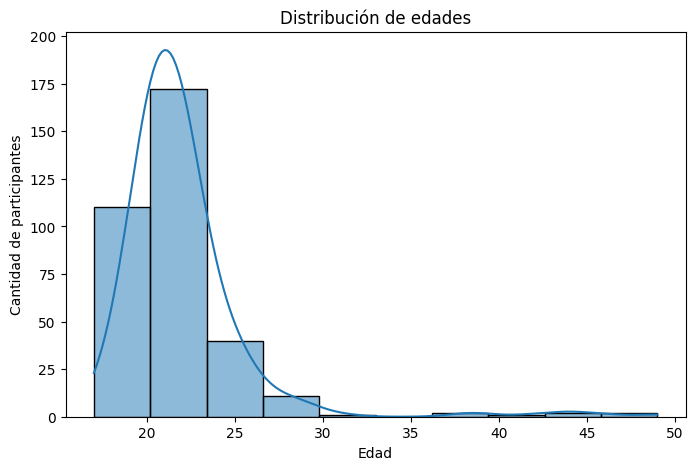

In [4]:
#ANALISIS POR EDAD
print(df["Edad:"].describe())

# histograma
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["Edad:"], bins=10, kde=True)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Cantidad de participantes")
plt.show()

In [5]:
#ANALISIS DE GENEROS
genero_counts = df["Género:"].value_counts()
genero_percent = df["Género:"].value_counts(normalize=True) * 100

print("Cantidad por género:\n", genero_counts)
print("\nPorcentaje por género:\n", genero_percent.round(2))


Cantidad por género:
 Género:
Masculino                                                   218
Femenino                                                    119
LGBT+                                                         2
femenino pero lgb no es género es una orientación sexual      1
Prefiero no decirlo                                           1
Name: count, dtype: int64

Porcentaje por género:
 Género:
Masculino                                                   63.93
Femenino                                                    34.90
LGBT+                                                        0.59
femenino pero lgb no es género es una orientación sexual     0.29
Prefiero no decirlo                                          0.29
Name: proportion, dtype: float64


In [6]:
#ANALISIS DE ESTADO LABORAL
estado_actual = df["Actualmente te encuentras:"].value_counts()
estado_actual_percent = df["Actualmente te encuentras:"].value_counts(normalize=True) * 100

print("Situación actual:\n", estado_actual)
print("\nPorcentaje:\n", estado_actual_percent.round(2))

Situación actual:
 Actualmente te encuentras:
Estudiando    216
Ambos          94
Trabajando     28
Ninguno         3
Name: count, dtype: int64

Porcentaje:
 Actualmente te encuentras:
Estudiando    63.34
Ambos         27.57
Trabajando     8.21
Ninguno        0.88
Name: proportion, dtype: float64


In [7]:
#ESTADO DE PROCEDENCIA
estado_origen_counts = df["Estado de origen:"].value_counts()

print("Estado de origen (Top 15):\n", estado_origen_counts.head(15))

Estado de origen (Top 15):
 Estado de origen:
Puebla              233
Veracruz             31
Tlaxcala             28
Oaxaca               10
Ciudad de México      8
Estado de México      7
Guerrero              7
Tabasco               4
Tamaulipas            2
Chiapas               2
Nayarit               1
Aguascalientes        1
Querétaro             1
Coahuila              1
Chihuahua             1
Name: count, dtype: int64


In [8]:
#Distribucion de respuestas y emociones
# Lista de columnas con las respuestas emocionales (preguntas 1 a 12)
preguntas = [col for col in df.columns if col.startswith("1.") or col.startswith("2.") or col.startswith("3.") or col.startswith("4.") or col.startswith("5.") or col.startswith("6.") or col.startswith("7.") or col.startswith("8.") or col.startswith("9.") or col.startswith("10.") or col.startswith("11.") or col.startswith("12.")]

# Revisar cuántas respuestas hay por pregunta
respuestas_por_pregunta = df[preguntas].notnull().sum()
print("Cantidad de respuestas por pregunta:\n", respuestas_por_pregunta)

Cantidad de respuestas por pregunta:
 1.  Recuerda un momento en el que lograste algo que realmente deseabas. ¿Cómo fue la experiencia y qué impacto tuvo en tu vida?                                               341
2. Describe una ocasión en la que alguien hizo algo especial o inesperado por ti y te hizo sentir bien. ¿Cómo reaccionaste?                                                   341
3. Piensa en una ocasión en la que perdiste algo o a alguien importante para ti. ¿Cómo viviste ese momento y qué cambió después de ello?                                      341
4. Recuerda un día en el que sentiste que todo te salía mal. ¿Qué sucedió y cómo te sentiste al respecto?                                                                     341
5. Describe una situación en la que experimentaste algo que te resultó desagradable y quisiste evitar. ¿Cómo fue ese momento?                                                 340
6. Recuerda una ocasión en la que viste o viviste algo que te pareció to

In [9]:
#ANALISIS RESPUESTAS POR EMOCION
# Crear diccionario de emociones y los prefijos de columnas correspondientes
emociones_prefix = {
    "Felicidad": ["1.", "2."],
    "Tristeza": ["3.", "4."],
    "Disgusto": ["5.", "6."],
    "Ira": ["7.", "8."],
    "Miedo": ["9.", "10."],
    "Sorpresa": ["11.", "12."]
}

# Calcular cantidad de respuestas por emoción
conteo_emociones = {}

for emocion, prefijos in emociones_prefix.items():
    # Seleccionar columnas que empiezan con los prefijos correspondientes
    columnas = [col for col in df.columns if any(col.strip().startswith(p) for p in prefijos)]

    # Contar respuestas no nulas
    conteo = df[columnas].notnull().sum().sum()
    conteo_emociones[emocion] = conteo

# Mostrar resultados
for emocion, cantidad in conteo_emociones.items():
    print(f"{emocion}: {cantidad} respuestas")


Felicidad: 682 respuestas
Tristeza: 682 respuestas
Disgusto: 681 respuestas
Ira: 682 respuestas
Miedo: 682 respuestas
Sorpresa: 682 respuestas


/tmp/ipykernel_16968/3906636845.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emoción', y='Cantidad', data=emociones_df, palette='pastel')


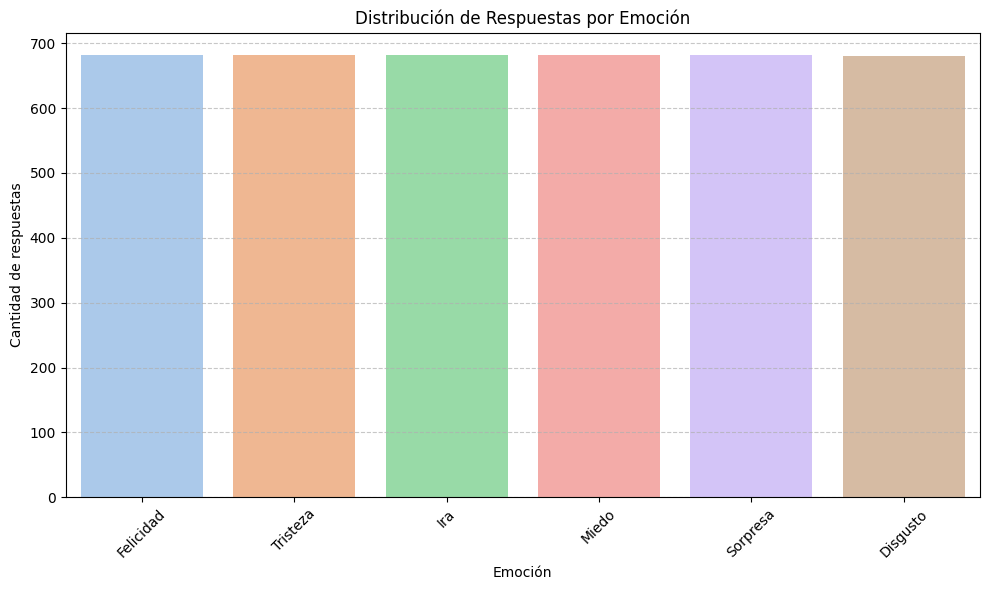

In [10]:
#GRAFICAS POR EMOCION
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener el diccionario 'conteo_emociones' del paso anterior

# Convertir el diccionario en DataFrame para graficar
emociones_df = pd.DataFrame.from_dict(conteo_emociones, orient='index', columns=['Cantidad'])
emociones_df = emociones_df.sort_values('Cantidad', ascending=False).reset_index()
emociones_df.columns = ['Emoción', 'Cantidad']

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Emoción', y='Cantidad', data=emociones_df, palette='pastel')
plt.title("Distribución de Respuestas por Emoción")
plt.xlabel("Emoción")
plt.ylabel("Cantidad de respuestas")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
#NUBES DE PALABRAS Y DIAGRAMAS
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Asociación de emociones con los prefijos de preguntas
emociones_prefix = {
    "Felicidad": ["1.", "2."],
    "Tristeza": ["3.", "4."],
    "Disgusto": ["5.", "6."],
    "Ira": ["7.", "8."],
    "Miedo": ["9.", "10."],
    "Sorpresa": ["11.", "12."]
}

# Crear un diccionario que contenga todos los textos por emoción
textos_por_emocion = {}

for emocion, prefijos in emociones_prefix.items():
    columnas = [col for col in df.columns if any(col.strip().startswith(p) for p in prefijos)]

    # Concatenar todos los textos no nulos en un solo string
    textos = df[columnas].fillna("").agg(' '.join, axis=1).str.cat(sep=' ')
    textos_por_emocion[emocion] = textos.lower()  # Convertir a minúsculas para limpieza


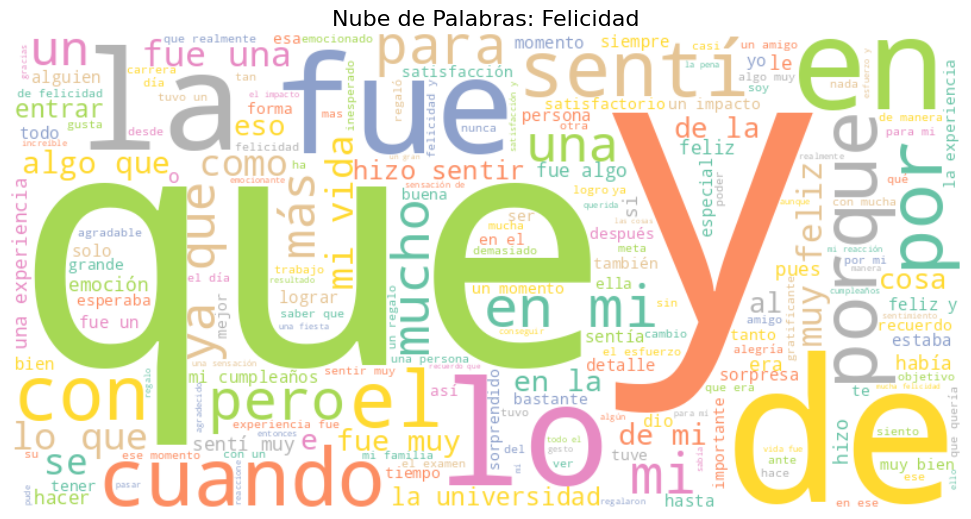

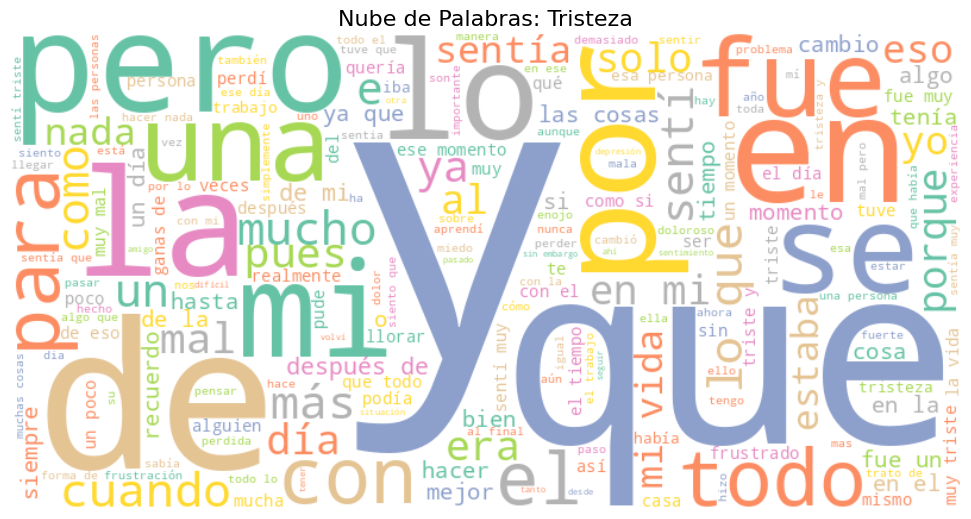

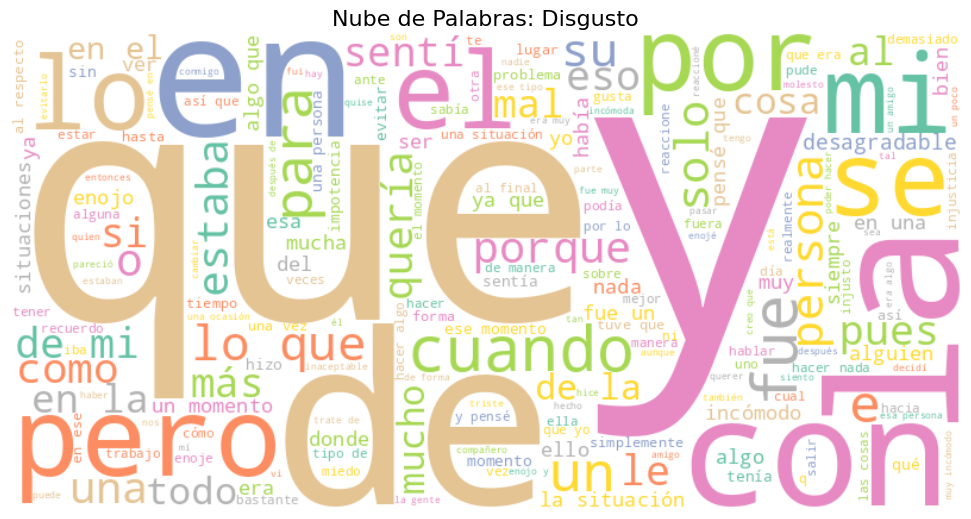

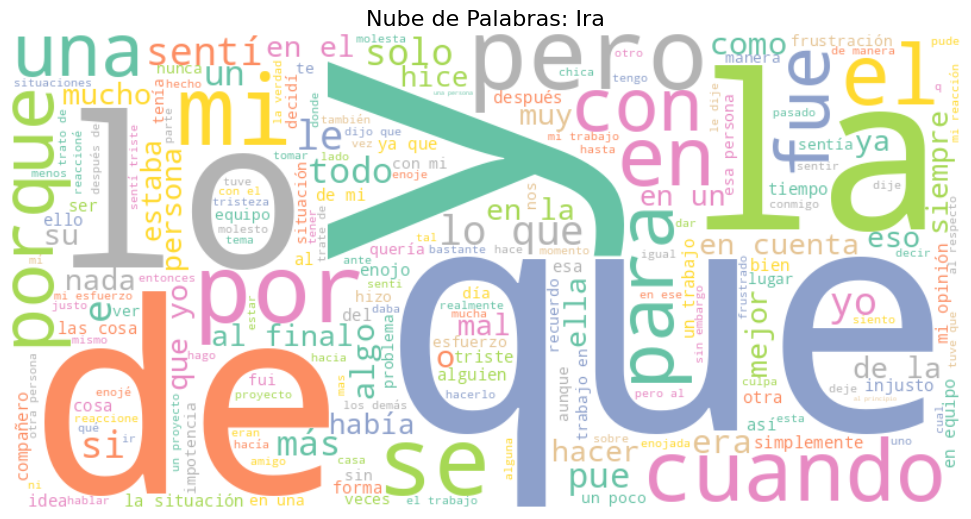

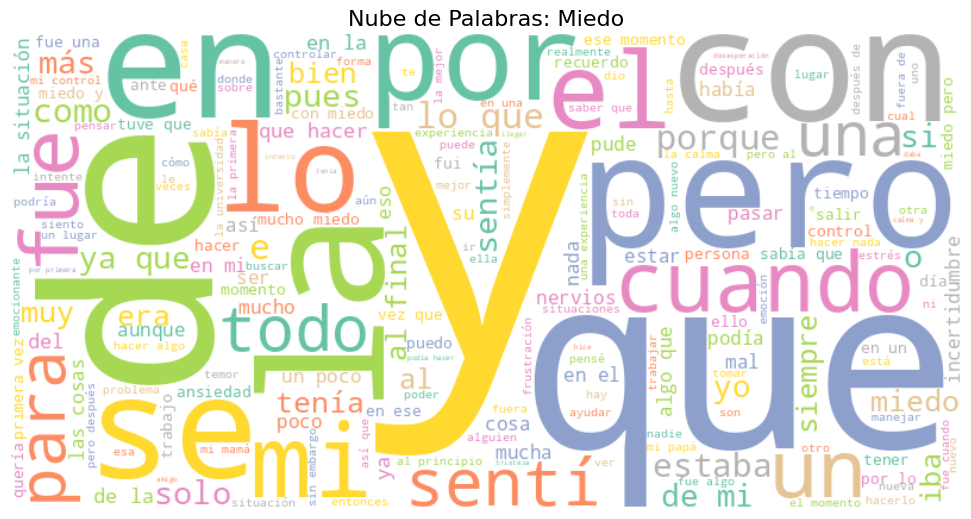

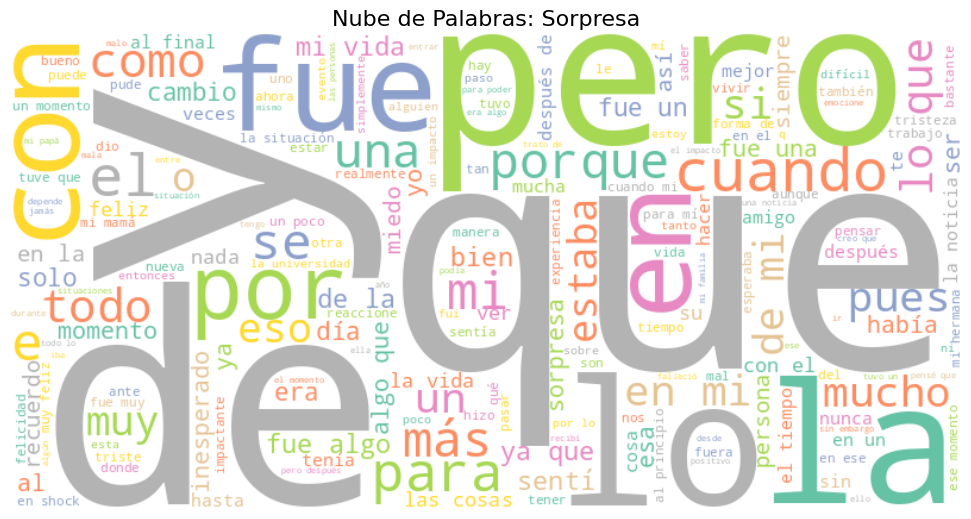

In [12]:
# Opcional: Definir palabras vacías (stopwords)
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

# Generar nubes de palabras
for emocion, texto in textos_por_emocion.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=stopwords, colormap='Set2').generate(texto)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Nube de Palabras: {emocion}", fontsize=16)
    plt.tight_layout(pad=0)
    plt.show()

/tmp/ipykernel_16968/3274876835.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteos_top, y=palabras_top, palette='muted')


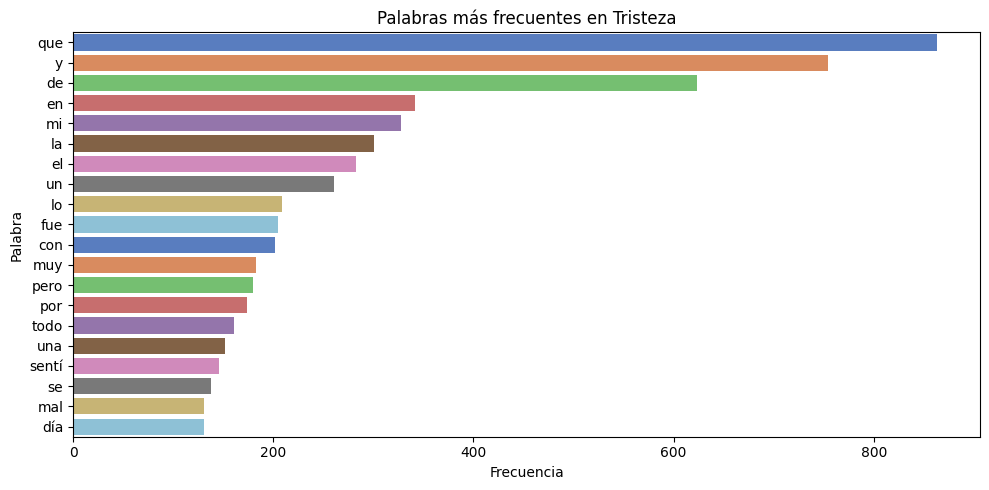

In [13]:
#DIAGRAMA DE FRECUENCIA DE PALABRAS
from collections import Counter
import re

# Elegir emoción
emocion_objetivo = "Tristeza"
texto = textos_por_emocion[emocion_objetivo]

# Limpiar texto: quitar signos de puntuación, números y dividir en palabras
palabras = re.findall(r'\b[a-záéíóúüñ]+\b', texto)


# Contar palabras (excluyendo stopwords)
frecuencias = Counter([w for w in palabras if w not in stopwords])

# Mostrar las 20 más comunes
mas_comunes = frecuencias.most_common(20)

# Graficar
palabras_top, conteos_top = zip(*mas_comunes)
plt.figure(figsize=(10, 5))
sns.barplot(x=conteos_top, y=palabras_top, palette='muted')
plt.title(f"Palabras más frecuentes en {emocion_objetivo}")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.tight_layout()
plt.show()

# **2 preprocesamiento para IT-IDF**

Filtro de filas

In [14]:
# Lista de respuestas irrelevantes conocidas
respuestas_irrelevantes = {"", ".", "nada", "ninguna", "ninguno", "no", "no sé", "na", "no recuerdo"}

# Función: contar cuántas preguntas en la fila tienen respuestas irrelevantes o de menos de 3 palabras
def respuestas_invalidas_por_fila(fila):
    count = 0
    for col in columnas_preguntas:
        texto = str(fila[col]).strip().lower()
        palabras = texto.split()
        if texto in respuestas_irrelevantes or len(palabras) < 3:
            count += 1
    return count

# Aplicar filtro: permitir solo filas donde el número de respuestas "pobres" sea menor a 3
df_filtrado = df[df.apply(respuestas_invalidas_por_fila, axis=1) < 3].copy()

# Verificación
print(f"Filas antes del filtrado: {df.shape[0]}")
print(f"Filas después del nuevo filtrado: {df_filtrado.shape[0]}")

Filas antes del filtrado: 341
Filas después del nuevo filtrado: 310


Correccion de gramatica

In [15]:
import language_tool_python


# Inicializar herramienta para español
tool = language_tool_python.LanguageTool('es')

# Crear una copia del DataFrame filtrado para trabajar con texto corregido
df_gramatical = df_filtrado.copy()

# Función para corregir texto
def corregir_texto(texto):
    if pd.isna(texto) or not isinstance(texto, str) or texto.strip() == "":
        return texto
    return tool.correct(texto)

# Aplicar corrección gramatical a cada columna de preguntas emocionales
for col in columnas_preguntas:
    df_gramatical[col + "_corregido"] = df_gramatical[col].apply(corregir_texto)


In [16]:
col = columnas_preguntas[0]  # puedes cambiarlo por otra pregunta

# Mostrar ejemplo de antes y después
df_gramatical[[col, col + "_corregido"]].sample(5)


,1. Recuerda un momento en el que lograste algo que realmente deseabas. ¿Cómo fue la experiencia y qué impacto tuvo en tu vida?,1. Recuerda un momento en el que lograste algo que realmente deseabas. ¿Cómo fue la experiencia y qué impacto tuvo en tu vida? _corregido
14,Logré ingresar a la universidad que deseaba. F...,Logré ingresar a la universidad que deseaba. F...
322,"Deseaba mucho vivir en Noruega, cuando finalme...","Deseaba mucho vivir en Noruega, cuando finalme..."
114,Mi primer meta fue poder estudiar la licenciat...,Mi primer meta fue poder estudiar la licenciat...
241,"Sí, fue la prima vez que mi fui a trabajar a U...","Sí, fue la prima vez que mi fui a trabajar a U..."
309,"En la preparatoria, después, al entrar a la un...","En la preparatoria, después, al entrar a la un..."


Limpiar texto

In [17]:
import re
import unicodedata

def limpiar_texto_regex(texto):
    if pd.isna(texto) or not isinstance(texto, str):
        return ""

    # 1. Normaliza espacios
    texto = texto.strip()

    # 2. Pasa a minúsculas
    texto = texto.lower()

    # 3. Elimina acentos (normaliza unicode y remueve marcas diacríticas)
    texto = unicodedata.normalize('NFD', texto)
    texto = texto.encode('ascii', 'ignore').decode('utf-8')

    # 4. Elimina caracteres especiales, números y signos de puntuación
    texto = re.sub(r'[^a-zñ\s]', '', texto)

    # 5. Unifica múltiples espacios
    texto = re.sub(r'\s+', ' ', texto).strip()

    return texto


for col in columnas_preguntas:
    col_corregida = col + "_corregido"
    col_limpia = col + "_corregido_limpio"
    df_gramatical[col_limpia] = df_gramatical[col_corregida].apply(limpiar_texto_regex)

    #VALIDACION
df[columnas_preguntas].sample(3)

,1. Recuerda un momento en el que lograste algo que realmente deseabas. ¿Cómo fue la experiencia y qué impacto tuvo en tu vida?,2. Describe una ocasión en la que alguien hizo algo especial o inesperado por ti y te hizo sentir bien. ¿Cómo reaccionaste?,3. Piensa en una ocasión en la que perdiste algo o a alguien importante para ti. ¿Cómo viviste ese momento y qué cambió después de ello?,4. Recuerda un día en el que sentiste que todo te salía mal. ¿Qué sucedió y cómo te sentiste al respecto?,5. Describe una situación en la que experimentaste algo que te resultó desagradable y quisiste evitar. ¿Cómo fue ese momento?,6. Recuerda una ocasión en la que viste o viviste algo que te pareció totalmente inaceptable. ¿Cómo reaccionaste y qué pensaste al respecto?,7. Piensa en un momento en el que sentiste que alguien fue injusto contigo. ¿Qué ocurrió y cómo reaccionaste?,8. Describe una ocasión en la que te sentiste frustrado(a) porque no tomaron en cuenta tu opinión o esfuerzo. ¿Cómo reaccionaste ante esta situación y cómo la manejaste?,9. Recuerda una ocasión en la que tuviste que enfrentarte a algo incierto o desconocido. ¿Cómo fue la experiencia y qué sentiste en ese momento?,10. Describe un evento en el que sentiste que algo estaba fuera de tu control y no sabías qué hacer. ¿Cómo reaccionaste y qué pasó después?,11. Piensa en un momento en el que ocurrió algo totalmente inesperado en tu vida. ¿Cómo fue y qué pasó después?,12. Recuerda una ocasión en la que recibiste una noticia o viviste un evento que nunca imaginaste. ¿Cómo reaccionaste y qué impacto tuvo en ti?
5,Sentí mucha satisfacción y casi todo el tiempo...,Mis amigos me regalaron en mi cumpleaños un ju...,Me sentí triste y como si algo me faltaba,Trate de ver el lado positivo e intenté no sen...,Andaba caminando y me llegó un olor muy fuert...,Andaba en el stu y habían unos vatos diciendo ...,No considerarme aunque sabia que hacer y me ec...,Muchas veces en los trabajos en equipo no escu...,Muchas veces es con experiencias que no había ...,"Sentía que tenía que hacer algo, todo salió bi...",Me saque de onda y me acordé casi todo el día ...,No sabía cómo reaccionar pero después vi como ...
17,"Inicialmente me sentí feliz y emocionado, con ...","Se siente realmente agradable, me hizo sentir ...",Cuando murió mi perro que estuvo conmigo la ma...,Inicialmente me sentí defraudado conmigo mismo...,Actualmente no recuerdo una situación así,"Me sentí enojado, traté de reaccionar de una f...","Me sentí traicionado, decidí ignorarlo, más no...","Decidí quedarme callado e ignorarlo, de igual ...",Inicialmente es emocionante y a la vez da un p...,"Decidí no pensar mucho en ello, me dije que si...","Me sentí impactado por la noticia, y a su vez ...","Me sentí muy asustado y triste, me hizo odiar ..."
283,Fue agradable e impacto de forma positiva,Reaccioné bien porque fue algo agradable,Desagradable,"Me caí, fue Mal",Fue molesto,"Pues de forma negativa , y pensé mal de las pe...",Reaccioné con frustración,"Con más frustración , solo lo dejé estar",Negativa,Intente resolverlo de otra forma,"Lo resolví , después de pensarlo un poco",Una reacción de sorpresa


Tokenizar

In [18]:
import spacy
import pandas as pd

# Cargar modelo en español
import es_core_news_sm
nlp = es_core_news_sm.load()

# Función de tokenización con spaCy
def tokenizar_spacy(texto):
    if pd.isna(texto) or not isinstance(texto, str):
        return []
    texto = texto.strip()  # Asegura que no haya espacios iniciales
    doc = nlp(texto)
    return [token.text for token in doc if not token.is_space]


# Aplicar tokenización a las columnas limpias
for col in columnas_preguntas:
    col_limpio = col + "_corregido_limpio"
    col_tokens = col + "_tokens"
    df_gramatical[col_tokens] = df_gramatical[col_limpio].apply(tokenizar_spacy)

    # Verificación
pd.set_option('display.max_colwidth', None)
col = columnas_preguntas[0]
df_gramatical[[col + "_corregido_limpio", col + "_tokens"]].sample(3)

,1. Recuerda un momento en el que lograste algo que realmente deseabas. ¿Cómo fue la experiencia y qué impacto tuvo en tu vida? _corregido_limpio,1. Recuerda un momento en el que lograste algo que realmente deseabas. ¿Cómo fue la experiencia y qué impacto tuvo en tu vida? _tokens
140,me senti muy feliz pero fue algo temporal que no tuvo repercusion en mi vida quizas solo experiencia de lo sucedido,"[me, senti, muy, feliz, pero, fue, algo, temporal, que, no, tuvo, repercusion, en, mi, vida, quizas, solo, experiencia, de, lo, sucedido]"
56,al principio sentia satisfaccion pero casi siempre se me quitaba al momento,"[al, principio, sentia, satisfaccion, pero, casi, siempre, se, me, quitaba, al, momento]"
269,muy satisfactoria llanto al liberarme de la presion y mucha felicidad al mismo tiempo por haber conseguido algo que era parte de una meta primordial en mi vida tanto academica como para el futuro profesional,"[muy, satisfactoria, llanto, al, liberarme, de, la, presion, y, mucha, felicidad, al, mismo, tiempo, por, haber, conseguido, algo, que, era, parte, de, una, meta, primordial, en, mi, vida, tanto, academica, como, para, el, futuro, profesional]"


Stop words

In [19]:
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

# Descargar recursos si faltan
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# 1. Lista base de stopwords
stop_words = set(stopwords.words('spanish'))

# 2. Palabras que queremos conservar
palabras_cruciales = {'no', 'nunca', 'jamás', 'me', 'mi', 'yo', 'sentí', 'fue', 'cuando', 'porque', 'nada', 'todo', 'bien', 'mal'}

# 3. Stopwords personalizadas
stop_words_personalizadas = stop_words - palabras_cruciales

# Función para eliminar stopwords personalizadas
def eliminar_stopwords(tokens):
    return [token for token in tokens if token not in stop_words_personalizadas]

# Aplicar a los tokens
for col in columnas_preguntas:
    col_tokens = col + "_tokens"
    col_clean = col + "_tokens_clean"
    df_gramatical[col_clean] = df_gramatical[col_tokens].apply(eliminar_stopwords)


In [20]:
pd.set_option('display.max_colwidth', None)

col = columnas_preguntas[0]
df_gramatical[[col + "_corregido", col + "_tokens_clean"]].sample(5)

,1. Recuerda un momento en el que lograste algo que realmente deseabas. ¿Cómo fue la experiencia y qué impacto tuvo en tu vida? _corregido,1. Recuerda un momento en el que lograste algo que realmente deseabas. ¿Cómo fue la experiencia y qué impacto tuvo en tu vida? _tokens_clean
338,"Me hace sentir satisfecha, orgullosa y me anima a seguir logrando cosas","[me, hace, sentir, satisfecha, orgullosa, me, anima, seguir, logrando, cosas]"
20,Me siento más tranquilo por haber completado lo que me prometí.,"[me, siento, mas, tranquilo, haber, completado, me, prometi]"
90,Fue emocionante y me causó altas expectativas,"[fue, emocionante, me, causo, altas, expectativas]"
114,"Mi primer meta fue poder estudiar la licenciatura en la universidad que fue siempre mi primera opción, fue uno de los mejores días de mi vida, ya que la verdad sentía que no iba a lograr alcanzar algún cupo dentro de la BÚA, desde ese día siempre me he propuesto a ser mejor que el que era ayer.","[mi, primer, meta, fue, poder, estudiar, licenciatura, universidad, fue, siempre, mi, primera, opcion, fue, mejores, dias, mi, vida, verdad, sentia, no, iba, lograr, alcanzar, algun, cupo, dentro, bua, dia, siempre, me, propuesto, ser, mejor, ayer]"
198,No,[no]


Lematizacion

In [21]:
import spacy
import es_core_news_sm
import pandas as pd

# Cargar modelo de idioma español
nlp = es_core_news_sm.load()

def lematizar_tokens(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

for col in columnas_preguntas:
    col_tokens_clean = col + "_tokens_clean"
    col_lemmas = col + "_lemmas"
    df_gramatical[col_lemmas] = df_gramatical[col_tokens_clean].apply(lematizar_tokens)


pd.set_option('display.max_colwidth', None)

# Elige una pregunta, por ejemplo la 1. (puedes cambiar el índice)
col = columnas_preguntas[0]

# Mostrar 10 filas de ejemplo con:
# - Texto corregido
# - Tokens limpios
# - Lemas aplicados
df_gramatical[[col + "_corregido", col + "_tokens_clean", col + "_lemmas"]].sample(10)

,1. Recuerda un momento en el que lograste algo que realmente deseabas. ¿Cómo fue la experiencia y qué impacto tuvo en tu vida? _corregido,1. Recuerda un momento en el que lograste algo que realmente deseabas. ¿Cómo fue la experiencia y qué impacto tuvo en tu vida? _tokens_clean,1. Recuerda un momento en el que lograste algo que realmente deseabas. ¿Cómo fue la experiencia y qué impacto tuvo en tu vida? _lemmas
270,"Recuerdo cuando vi mi carta de aceptación en la universidad, y la experiencia fue muy satisfactoria el ver qué había logrado algo importante y tuvo un impactó muy positivo","[recuerdo, cuando, vi, mi, carta, aceptacion, universidad, experiencia, fue, satisfactoria, ver, habia, logrado, importante, impacto, positivo]","[recordar, cuando, ver, mi, carta, aceptacion, universidad, experiencia, ser, satisfactorio, ver, habia, logrado, importante, impacto, positivo]"
188,"Sí, cuando entre a la universidad. Ha tenido un gran impacto en mi vida porque he vivido grandes experiencias y me ha permitido conocer muchas personas y sobre todo conocerme a misma.","[si, cuando, universidad, gran, impacto, mi, vida, porque, vivido, grandes, experiencias, me, permitido, conocer, muchas, personas, todo, conocerme, misma]","[si, cuando, universidad, gran, impacto, mi, vida, porque, vivir, grande, experiencia, yo, permitir, conocer, mucho, persona, todo, conocer yo, mismo]"
59,"Obviamente, impactó de manera positiva, ya que conseguir algo que deseas siempre resulta satisfactorio","[obviamente, impacto, manera, positiva, conseguir, deseas, siempre, resulta, satisfactorio]","[obviamente, impacto, manero, positivo, conseguir, desea, siempre, resultar, satisfactorio]"
24,"Pues fue algo raro. La última vez que logré algo que en verdad deseaba momentos antes que lo obtuviera me sentía con muchos nervios y emoción y cuando lo obtuve solo fue como paz, satisfacción, no fue una alegría inmensa sino que solo me sentí bien.","[pues, fue, raro, ultima, vez, logre, verdad, deseaba, momentos, obtuviera, me, sentia, nervios, emocion, cuando, obtuve, solo, fue, paz, satisfaccion, no, fue, alegria, inmensa, sino, solo, me, senti, bien]","[pues, ser, raro, ultima, vez, logre, verdad, desear, momento, obtuviera, yo, sentia, nervio, emocion, cuando, obtener, solo, ser, paz, satisfaccion, no, ser, alegrio, inmenso, sino, solo, yo, senti, bien]"
17,"Inicialmente, me sentí feliz y emocionado, con una sensación de superación personal, pero esos sentimientos duraron poco, al pasar de los minutos me comencé a sentir como si nada de lo que hice hubiera pasado","[inicialmente, me, senti, feliz, emocionado, sensacion, superacion, personal, sentimientos, duraron, pasar, minutos, me, comence, sentir, si, nada, hice, pasado]","[inicialmente, yo, senti, feliz, emocionado, sensacion, superacion, personal, sentimiento, durar, pasar, minuto, yo, comence, sentir, si, nada, hacer, pasado]"
99,"Lograrlo, fue un momento de mucha felicidad, darme cuenta de que la base de los resultados es la disciplina, el trabajo, el esfuerzo y la dedicación","[lograrlo, fue, momento, mucha, felicidad, darme, cuenta, base, resultados, disciplina, trabajo, esfuerzo, dedicacion]","[lograr él, ser, momento, mucho, felicidad, darme, cuenta, base, resultado, disciplín, trabajo, esfuerzo, dedicacion]"
327,"Uno de los momentos más importantes para mí fue cuando compré mi primer auto con mi propio esfuerzo. Ahorré durante mucho tiempo, me privé de muchas cosas y trabajé duro para lograrlo. El día que lo tuve frente a mí, con las llaves en la mano, sentí una mezcla de orgullo, emoción y satisfacción. Fue una prueba tangible de que todo sacrificio tiene su recompensa","[momentos, mas, importantes, mi, fue, cuando, compre, mi, primer, auto, mi, propio, esfuerzo, ahorre, tiempo, me, prive, muchas, cosas, trabaje, duro, lograrlo, dia, frente, mi, llaves, mano, senti, mezcla, orgullo, emocion, satisfaccion, fue, prueba, tangible, todo, sacrificio, recompensa]","[momento, mas, importante, mi, ser, cuando, c

Vectorizacion con TF-IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convertimos listas de lemas a strings
def lemas_a_texto(lemas):
    return " ".join(lemas) if isinstance(lemas, list) else ""

# Crear corpus por emoción combinando las columnas de preguntas asociadas
emociones_preguntas = {
    "Felicidad": ["1.", "2."],
    "Tristeza": ["3.", "4."],
    "Disgusto": ["5.", "6."],
    "Ira": ["7.", "8."],
    "Miedo": ["9.", "10."],
    "Sorpresa": ["11.", "12."]
}

# Generar una nueva columna 'texto_emocion' y 'etiqueta_emocion'
filas_emocionales = []

for emocion, prefijos in emociones_preguntas.items():
    cols = [col for col in columnas_preguntas if any(col.startswith(p) for p in prefijos)]
    for _, fila in df_gramatical.iterrows():
        # Combinar los lemas de ambas preguntas
        lemas_combinados = []
        for col in cols:
            col_lemmas = col + "_lemmas"
            if col_lemmas in df_gramatical.columns:
                lemas_combinados.extend(fila[col_lemmas])
        if len(lemas_combinados) > 0:
            filas_emocionales.append({
                "texto": lemas_a_texto(lemas_combinados),
                "etiqueta": emocion
            })

# Convertir en DataFrame final para modelado
df_vectores = pd.DataFrame(filas_emocionales)
print(df_vectores.head())


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      texto  \
0  yo senti realmente feliz emocionado haber conseguir anhelar porque sabio fruto mi esfuerzo dedicacion completamente convencido haber lograr mi sueno oportunidad esperar yo desempenariar mi trabajo amor pasion conseguir logro yo hacia sentir yo mejor persona alguien seguia crecer mejorar personal profesionalmente recordar vez dia mi cumplean

In [23]:
# Inicializar vectorizador
vectorizador = TfidfVectorizer()

# Ajustar y transformar
X_tfidf = vectorizador.fit_transform(df_vectores["texto"])

# Mostrar forma del resultado
print("Dimensión de la matriz TF-IDF:", X_tfidf.shape)


Dimensión de la matriz TF-IDF: (1860, 5362)


In [24]:
#VISUALIZAR CAMBIOS
# Elegir el primer documento (puedes cambiar el índice)
i = 0

# Obtener los términos y pesos TF-IDF del primer documento
feature_names = vectorizador.get_feature_names_out()
vector = X_tfidf[i]

# Convertir a formato legible (diccionario de palabra: peso)
vector_dict = {feature_names[idx]: vector[0, idx] for idx in vector.nonzero()[1]}

# Mostrar los términos más relevantes (ordenados)
import pprint
pprint.pprint(sorted(vector_dict.items(), key=lambda x: -x[1])[:15])  # Top 15

[('yo', np.float64(0.22897767513185036)),
 ('conseguir', np.float64(0.20672963169146086)),
 ('mi', np.float64(0.20273199102940515)),
 ('cumpleano', np.float64(0.1991978259136734)),
 ('haber', np.float64(0.1703078336499196)),
 ('hacia', np.float64(0.16319140590734219)),
 ('convencido', np.float64(0.1569168744611538)),
 ('desempenariar', np.float64(0.1569168744611538)),
 ('esclava', np.float64(0.1569168744611538)),
 ('platar', np.float64(0.1569168744611538)),
 ('realmente', np.float64(0.1512062284574306)),
 ('esperar', np.float64(0.14918638858799602)),
 ('pasion', np.float64(0.14879709726007193)),
 ('pastel', np.float64(0.14879709726007193)),
 ('obsequiar', np.float64(0.14879709726007193))]


In [59]:
# Mostrar muestra
print("Total de ejemplos:", df_individual.shape[0])
df_vectores.sample(10)

Total de ejemplos: 1860


,texto,etiqueta
233,ser impacto bonito hecho saber hacer lograr yo gustar no ser tanto comun hacer sentir mente vida persón,Felicidad
450,ser momento dificil tiempo aceptar asimilar todo cosa cambiar aspecto ver cosa cuando sacar mala nota mi semestre senti no tenia nada habia logrado mi propio descuido,Tristeza
1094,yo senti despreciado tema familiar salida amigo hacer ano yo senti ignorado final resulto ser mejor esperar,Ira
1575,pandemia repente todo cambio hecho no podiar salir lado yo gustar tenia preocupacion algun familiar pasar tal vez actual serio paro ultimo dia clase no porque citar pasaporte dio cancelar clase paro momento raro yo sentir pandemia cosa todo bien,Sorpresa
411,recordar cuando yo mudir poblar pues aunque mi hermano menor no vivia podiar visitar él pasar tiempo cambio cuando mudar yo primero mes realmente deprimente yo senti disociado charla mantener renuent aunque querer comunicacion no mismo aprendido fortaleza seguido mi vida vez comunicacion seguir mejorar recordar cuando terminar mi ahora exnovia ser momento triste adema ser detonante fuerte depresion trauma emocional pasado aunque intentar mejorar ir terapia tratar salvar relacion parecia adema depresion yo hacer fallar dos semestre universidad agrego frustracion desesperanzo ser largo lapso tiempo yo mantener cambio emocional altamente inestable,Tristeza
1144,yo enoje mejor yo simplemente dejar persona participarar mas mi ayuda,Ira
1531,cuando yo dejar solo bazar mi jefa decido dividir puesto ausento hora dejandomar cargo dos puesto separado sumamente estresado cansado molesto cuando llegar tarde cuestión tercero tenia junto importante cuestión mi marca inicio yo estresar despues medite solte todo aceptar no habia nada poder hacer,Miedo
733,ser incomodo provoco decision definitivo alejar yo aunque creer jama vida hario asi solo querer alejar yo mas poder demasiado coraje debido injusto yo provocar demasiado indignacion yo mantener pensar él tiempo prolongado,Disgusto
886,sentir no yo venir nada mente no ningun recordar yo pasar,Disgusto
1170,calle cambio mi perspectiva persona no algun recordar asi,Ira


Division del dataset

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

# Función para graficar matriz de confusión
def plot_confusion_matrix(y_true, y_pred, titulo):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.xlabel("Predicción")
    plt.ylabel("Valor real")
    plt.title(titulo)
    plt.show()

# Datos y etiquetas
X = X_tfidf
y = df_vectores["etiqueta"]

# División 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Aplicar algoritmos

In [28]:
from sklearn.model_selection import GridSearchCV

# definimos los parametros a probar
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001]  # gamma se usa solo con kernel='rbf'
}

# iniciamos drid search
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid.fit(X_train, y_train)

# Mostrar mejores parámetros y score
print(" Mejores parámetros encontrados:", grid.best_params_)

✅ Mejores parámetros encontrados: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


--- Evaluación del modelo KNN ---
Accuracy: 0.6182795698924731

Classification Report:
              precision    recall  f1-score   support

    Disgusto       0.55      0.58      0.57        53
   Felicidad       0.71      0.92      0.80        61
         Ira       0.53      0.75      0.62        55
       Miedo       0.65      0.57      0.60        69
    Sorpresa       0.51      0.38      0.43        61
    Tristeza       0.74      0.55      0.63        73

    accuracy                           0.62       372
   macro avg       0.61      0.62      0.61       372
weighted avg       0.62      0.62      0.61       372



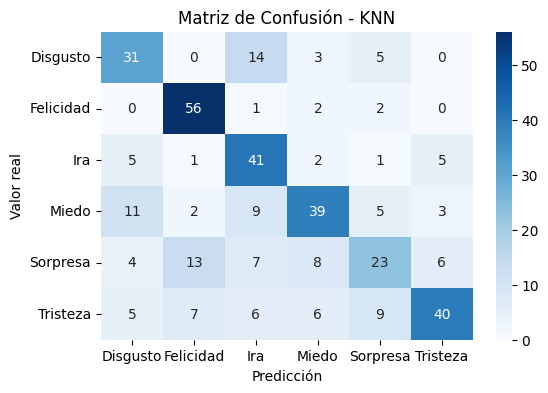


--- Evaluación del modelo Naive Bayes ---
Accuracy: 0.8091397849462365

Classification Report:
              precision    recall  f1-score   support

    Disgusto       0.77      0.68      0.72        53
   Felicidad       0.89      0.93      0.91        61
         Ira       0.73      0.87      0.79        55
       Miedo       0.80      0.81      0.81        69
    Sorpresa       0.78      0.64      0.70        61
    Tristeza       0.87      0.89      0.88        73

    accuracy                           0.81       372
   macro avg       0.81      0.80      0.80       372
weighted avg       0.81      0.81      0.81       372



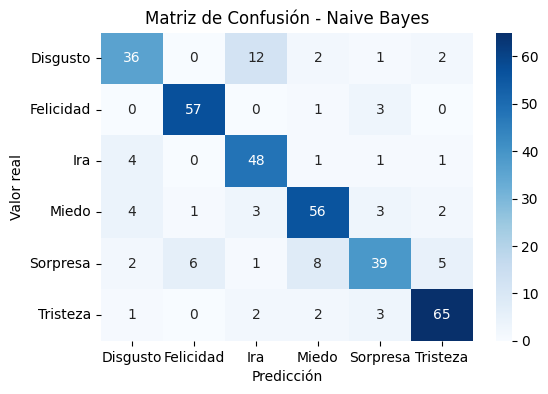


--- Evaluación del modelo Árbol de Decisión (ID3) ---
Accuracy: 0.41935483870967744

Classification Report:
              precision    recall  f1-score   support

    Disgusto       0.40      0.47      0.43        53
   Felicidad       0.42      0.56      0.48        61
         Ira       0.43      0.40      0.42        55
       Miedo       0.57      0.65      0.61        69
    Sorpresa       0.19      0.18      0.19        61
    Tristeza       0.45      0.26      0.33        73

    accuracy                           0.42       372
   macro avg       0.41      0.42      0.41       372
weighted avg       0.42      0.42      0.41       372



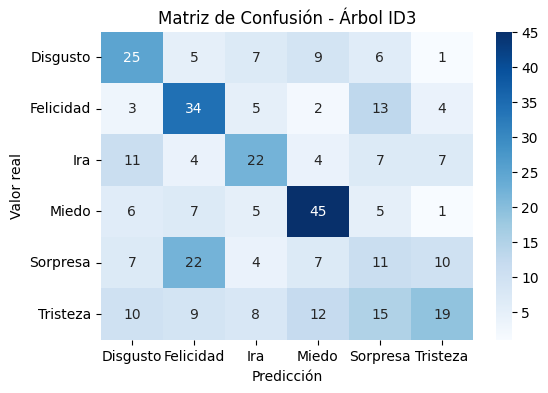


--- Evaluación del modelo Árbol de Decisión (C4.5) ---
Accuracy: 0.478494623655914

Classification Report:
              precision    recall  f1-score   support

    Disgusto       0.52      0.51      0.51        53
   Felicidad       0.53      0.62      0.57        61
         Ira       0.47      0.53      0.50        55
       Miedo       0.58      0.65      0.62        69
    Sorpresa       0.32      0.33      0.32        61
    Tristeza       0.41      0.26      0.32        73

    accuracy                           0.48       372
   macro avg       0.47      0.48      0.47       372
weighted avg       0.47      0.48      0.47       372



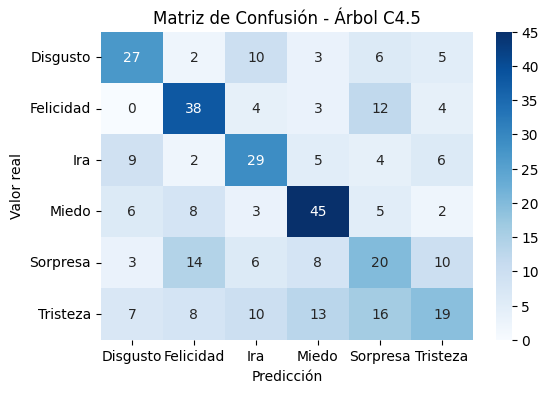


--- Evaluación del modelo Random Forest ---
Accuracy: 0.717741935483871

Classification Report:
              precision    recall  f1-score   support

    Disgusto       0.75      0.62      0.68        53
   Felicidad       0.74      0.90      0.81        61
         Ira       0.65      0.87      0.74        55
       Miedo       0.79      0.71      0.75        69
    Sorpresa       0.65      0.43      0.51        61
    Tristeza       0.72      0.77      0.74        73

    accuracy                           0.72       372
   macro avg       0.72      0.72      0.71       372
weighted avg       0.72      0.72      0.71       372



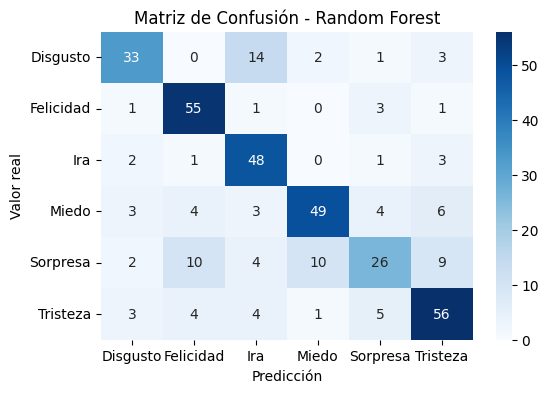

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt


### 1. KNN ###
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("--- Evaluación del modelo KNN ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
clf = knn  # para etiquetas en la matriz
plot_confusion_matrix(y_test, y_pred_knn, "Matriz de Confusión - KNN")

### 2. Naive Bayes ###
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("\n--- Evaluación del modelo Naive Bayes ---")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))
clf = nb
plot_confusion_matrix(y_test, y_pred_nb, "Matriz de Confusión - Naive Bayes")

### 3. Árbol de decisión ID3 (criterio 'entropy') ###
id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3.fit(X_train, y_train)
y_pred_id3 = id3.predict(X_test)

print("\n--- Evaluación del modelo Árbol de Decisión (ID3) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_id3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_id3))
clf = id3
plot_confusion_matrix(y_test, y_pred_id3, "Matriz de Confusión - Árbol ID3")

### 4. Árbol de decisión C4.5 (simplificado con 'gini') ###
c45 = DecisionTreeClassifier(criterion='gini', random_state=42)
c45.fit(X_train, y_train)
y_pred_c45 = c45.predict(X_test)

print("\n--- Evaluación del modelo Árbol de Decisión (C4.5) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_c45))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_c45))
clf = c45
plot_confusion_matrix(y_test, y_pred_c45, "Matriz de Confusión - Árbol C4.5")

### 5. Random Forest ###
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Evaluación del modelo Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
clf = rf
plot_confusion_matrix(y_test, y_pred_rf, "Matriz de Confusión - Random Forest")




--- Evaluación del modelo SVM ---
Accuracy: 0.771505376344086

Classification Report:
              precision    recall  f1-score   support

    Disgusto       0.68      0.72      0.70        53
   Felicidad       0.89      0.95      0.92        61
         Ira       0.73      0.78      0.75        55
       Miedo       0.79      0.70      0.74        69
    Sorpresa       0.69      0.69      0.69        61
    Tristeza       0.83      0.79      0.81        73

    accuracy                           0.77       372
   macro avg       0.77      0.77      0.77       372
weighted avg       0.77      0.77      0.77       372



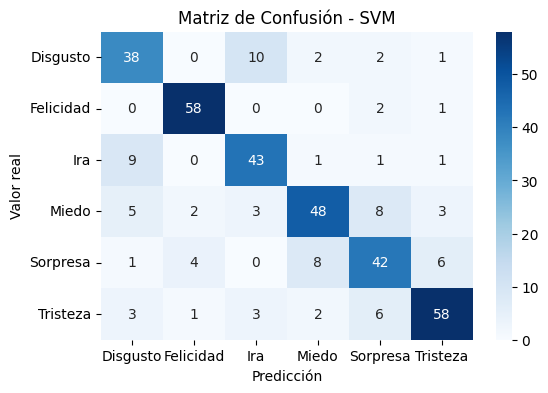

In [30]:
### 6. SVM ###
svm = SVC(C=10, gamma='scale', kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\n--- Evaluación del modelo SVM ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
clf = svm
plot_confusion_matrix(y_test, y_pred_svm, "Matriz de Confusión - SVM")


validacion cruzada

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Número de folds
k_folds = 5

# Inicializar listas para almacenar scores
knn_scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, cv=k_folds, scoring='accuracy')
nb_scores = cross_val_score(MultinomialNB(), X, y, cv=k_folds, scoring='accuracy')
tree_scores = cross_val_score(DecisionTreeClassifier(criterion='entropy', random_state=42), X, y, cv=k_folds, scoring='accuracy')
c45_scores = cross_val_score(DecisionTreeClassifier(criterion='gini', random_state=42), X, y, cv=k_folds, scoring='accuracy')
rf_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=k_folds, scoring='accuracy')
svm_scores = cross_val_score(SVC(C=1, gamma='scale', kernel='rbf'), X, y, cv=k_folds, scoring='accuracy')

# Mostrar resumen textual
print("\n--- Resultados Promedio de Validación Cruzada ---")
print("KNN:", np.mean(knn_scores))
print("Naive Bayes:", np.mean(nb_scores))
print("Árbol ID3 (Entropy):", np.mean(tree_scores))
print("Árbol C4.5 (Gini):", np.mean(c45_scores))
print("Random Forest:", np.mean(rf_scores))
print("SVM:", np.mean(svm_scores))



--- Resultados Promedio de Validación Cruzada ---
KNN: 0.5983870967741935
Naive Bayes: 0.7924731182795698
Árbol ID3 (Entropy): 0.456989247311828
Árbol C4.5 (Gini): 0.510752688172043
Random Forest: 0.7118279569892474
SVM: 0.7801075268817204


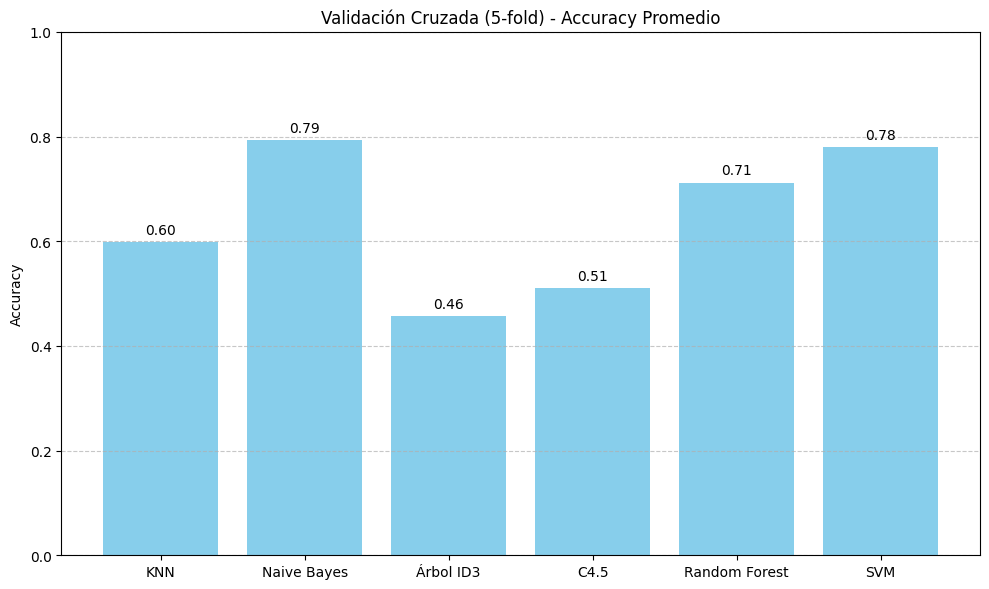

In [32]:
model_names = ["KNN", "Naive Bayes", "Árbol ID3", "C4.5", "Random Forest", "SVM"]
avg_scores = [
    np.mean(knn_scores),
    np.mean(nb_scores),
    np.mean(tree_scores),
    np.mean(c45_scores),
    np.mean(rf_scores),
    np.mean(svm_scores)
]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, avg_scores, color='skyblue')
plt.title(f"Validación Cruzada ({k_folds}-fold) - Accuracy Promedio")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los valores encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Uso de transformers

Limpieza basica

In [34]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# cargamos dataset oroginal
df = pd.read_csv("Nuevo_Dataset_Patrones_Emocionales.csv")
# dejamos las columnas de preguntas emocionales nada mas
columnas_emocionales = [col for col in df.columns if any(col.strip().startswith(f"{i}.") for i in range(1, 13))]

# eliminamos las filas sin preguntas de emociones
df = df.dropna(subset=columnas_emocionales, how='all')

#borramos respuestas cortas 
respuestas_irrelevantes = {"", ".", "nada", "ninguna", "ninguno", "no", "no sé", "na", "no recuerdo"}

def es_valida(fila):
    count_malas = 0
    for col in columnas_emocionales:
        texto = str(fila[col]).strip().lower()
        palabras = texto.split()
        if texto in respuestas_irrelevantes or len(palabras) < 3:
            count_malas += 1
    return count_malas < 3

df = df[df.apply(es_valida, axis=1)].copy()


Embeddings

In [35]:
# etiquetamos emociones para cada pregunta
emociones = {
    "Felicidad": ["1.", "2."],
    "Tristeza": ["3.", "4."],
    "Disgusto": ["5.", "6."],
    "Ira": ["7.", "8."],
    "Miedo": ["9.", "10."],
    "Sorpresa": ["11.", "12."]
}

data = []
for emocion, prefijos in emociones.items():
    columnas = [col for col in columnas_emocionales if any(col.strip().startswith(p) for p in prefijos)]
    for _, fila in df.iterrows():
        texto = " ".join(str(fila[col]) for col in columnas if pd.notnull(fila[col])).strip()
        if len(texto) > 10:  # mínimo contenido
            data.append((texto, emocion))

df_emociones = pd.DataFrame(data, columns=["texto", "etiqueta"])

# cargamos robertuito
modelo_name = "pysentimiento/robertuito-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(modelo_name)
model = AutoModel.from_pretrained(modelo_name)

# aqui sacamos embeddings con robertuito 
def obtener_embedding(texto):
    inputs = tokenizer(texto, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # [CLS]
    return cls_embedding.squeeze().numpy()

# generamos los embeddings
print("Generando embeddings (esto puede tardar)...")
embeddings = np.array([obtener_embedding(t) for t in df_emociones["texto"]])
X = embeddings
y = df_emociones["etiqueta"]

# dividimos dataset en 80 - 20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



/home/lfre/robertuito_env/lib/python3.12/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at pysentimiento/robertuito-base-uncased and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generando embeddings (esto puede tardar)...


evaluar en modelos

--- Evaluación del modelo KNN ---
Accuracy: 0.5833333333333334

Classification Report:
              precision    recall  f1-score   support

    Disgusto       0.48      0.60      0.53        53
   Felicidad       0.79      0.80      0.80        61
         Ira       0.61      0.78      0.68        55
       Miedo       0.52      0.48      0.50        69
    Sorpresa       0.48      0.36      0.41        61
    Tristeza       0.61      0.52      0.56        73

    accuracy                           0.58       372
   macro avg       0.58      0.59      0.58       372
weighted avg       0.58      0.58      0.58       372



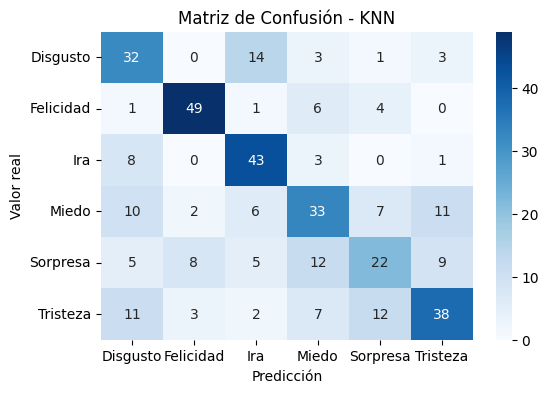


--- Evaluación del modelo Naive Bayes (Gaussiano) ---
Accuracy: 0.6935483870967742

Classification Report:
              precision    recall  f1-score   support

    Disgusto       0.69      0.58      0.63        53
   Felicidad       0.88      0.75      0.81        61
         Ira       0.71      0.87      0.78        55
       Miedo       0.65      0.67      0.66        69
    Sorpresa       0.54      0.51      0.53        61
    Tristeza       0.71      0.77      0.74        73

    accuracy                           0.69       372
   macro avg       0.70      0.69      0.69       372
weighted avg       0.70      0.69      0.69       372



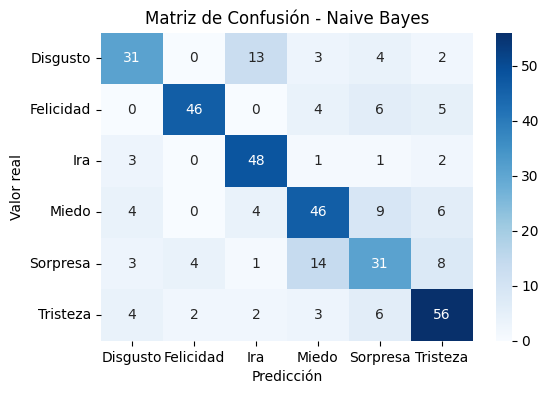


--- Evaluación del modelo Árbol de Decisión (ID3) ---
Accuracy: 0.4166666666666667

Classification Report:
              precision    recall  f1-score   support

    Disgusto       0.34      0.40      0.37        53
   Felicidad       0.66      0.64      0.65        61
         Ira       0.37      0.45      0.41        55
       Miedo       0.40      0.41      0.40        69
    Sorpresa       0.25      0.23      0.24        61
    Tristeza       0.47      0.38      0.42        73

    accuracy                           0.42       372
   macro avg       0.42      0.42      0.42       372
weighted avg       0.42      0.42      0.42       372



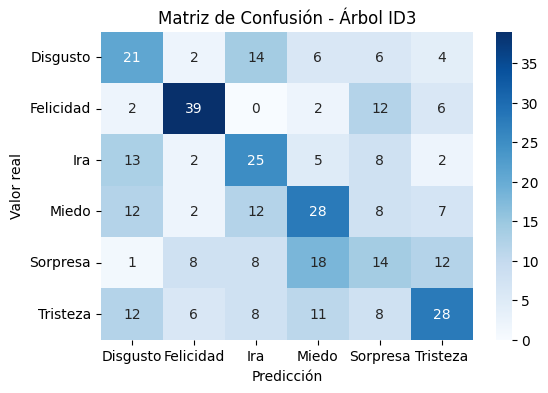


--- Evaluación del modelo Árbol de Decisión (C4.5) ---
Accuracy: 0.3978494623655914

Classification Report:
              precision    recall  f1-score   support

    Disgusto       0.31      0.32      0.31        53
   Felicidad       0.64      0.56      0.60        61
         Ira       0.35      0.42      0.38        55
       Miedo       0.38      0.33      0.36        69
    Sorpresa       0.25      0.33      0.29        61
    Tristeza       0.53      0.42      0.47        73

    accuracy                           0.40       372
   macro avg       0.41      0.40      0.40       372
weighted avg       0.42      0.40      0.40       372



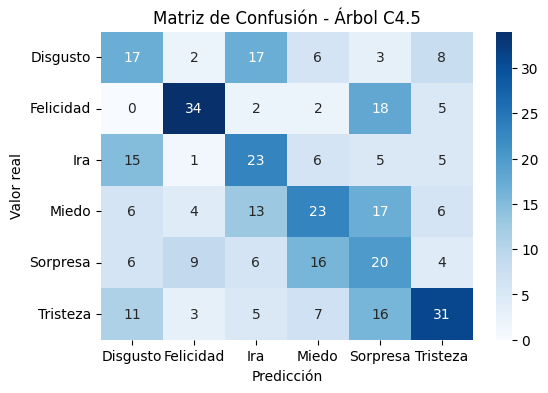


--- Evaluación del modelo Random Forest ---
Accuracy: 0.6827956989247311

Classification Report:
              precision    recall  f1-score   support

    Disgusto       0.62      0.62      0.62        53
   Felicidad       0.82      0.77      0.80        61
         Ira       0.64      0.76      0.69        55
       Miedo       0.64      0.70      0.67        69
    Sorpresa       0.60      0.43      0.50        61
    Tristeza       0.74      0.79      0.77        73

    accuracy                           0.68       372
   macro avg       0.68      0.68      0.67       372
weighted avg       0.68      0.68      0.68       372



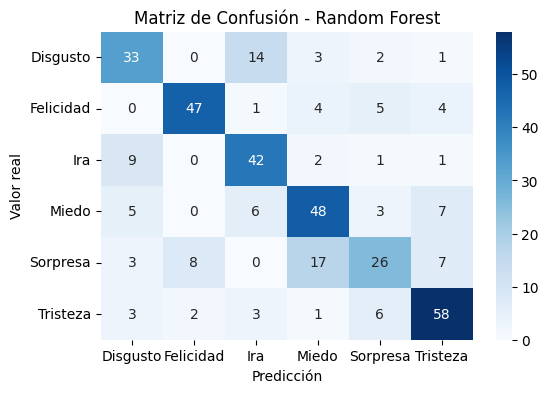


--- Evaluación del modelo SVM ---
Accuracy: 0.7580645161290323

Classification Report:
              precision    recall  f1-score   support

    Disgusto       0.83      0.72      0.77        53
   Felicidad       0.86      0.82      0.84        61
         Ira       0.77      0.89      0.82        55
       Miedo       0.73      0.80      0.76        69
    Sorpresa       0.56      0.52      0.54        61
    Tristeza       0.81      0.79      0.80        73

    accuracy                           0.76       372
   macro avg       0.76      0.76      0.76       372
weighted avg       0.76      0.76      0.76       372



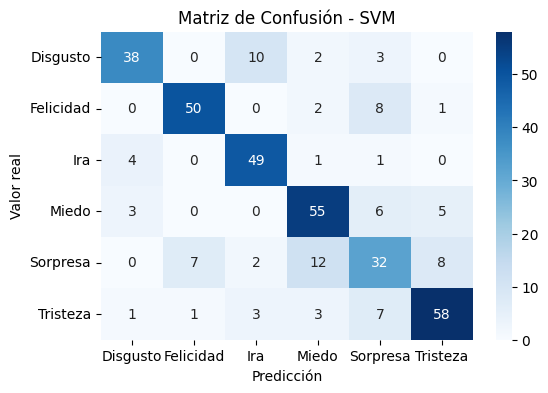

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# matriz de confusión
def plot_confusion_matrix(y_true, y_pred, titulo, etiquetas):
    cm = confusion_matrix(y_true, y_pred, labels=etiquetas)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=etiquetas, yticklabels=etiquetas)
    plt.xlabel("Predicción")
    plt.ylabel("Valor real")
    plt.title(titulo)
    plt.show()

# etiquetas para la matriz
etiquetas_unicas = sorted(list(set(y)))

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("--- Evaluación del modelo KNN ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
plot_confusion_matrix(y_test, y_pred_knn, "Matriz de Confusión - KNN", etiquetas_unicas)

# bayes 
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("\n--- Evaluación del modelo Naive Bayes (Gaussiano) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))
plot_confusion_matrix(y_test, y_pred_nb, "Matriz de Confusión - Naive Bayes", etiquetas_unicas)

# arbol ID3 (entropy)
id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3.fit(X_train, y_train)
y_pred_id3 = id3.predict(X_test)

print("\n--- Evaluación del modelo Árbol de Decisión (ID3) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_id3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_id3))
plot_confusion_matrix(y_test, y_pred_id3, "Matriz de Confusión - Árbol ID3", etiquetas_unicas)

# arbol C4.5 (gini) 
c45 = DecisionTreeClassifier(criterion='gini', random_state=42)
c45.fit(X_train, y_train)
y_pred_c45 = c45.predict(X_test)

print("\n--- Evaluación del modelo Árbol de Decisión (C4.5) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_c45))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_c45))
plot_confusion_matrix(y_test, y_pred_c45, "Matriz de Confusión - Árbol C4.5", etiquetas_unicas)

#randon forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Evaluación del modelo Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "Matriz de Confusión - Random Forest", etiquetas_unicas)

# svm
svm = SVC(C=1, gamma='scale', kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\n--- Evaluación del modelo SVM ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
plot_confusion_matrix(y_test, y_pred_svm, "Matriz de Confusión - SVM", etiquetas_unicas)


# Fine tunning

/home/lfre/robertuito_env/lib/python3.12/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/1488 [00:00<?, ? examples/s]

Map:   0%|          | 0/372 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pysentimiento/robertuito-base-uncased and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,Recall Macro,Precision Macro
1,1.751000,1.585276,0.518817,0.499018,0.518817,0.504921
2,1.221300,0.832692,0.717742,0.707764,0.717742,0.725666
3,0.613200,0.553065,0.806452,0.795584,0.806452,0.803904
4,0.324400,0.492936,0.833333,0.833406,0.833333,0.833666
5,0.166800,0.486646,0.833333,0.832550,0.833333,0.833581
6,0.082300,0.548377,0.817204,0.812995,0.817204,0.815600
7,0.040400,0.554891,0.825269,0.824243,0.825269,0.826129
8,0.026600,0.561584,0.825269,0.823998,0.825269,0.825191


Resultados del modelo fine-tuned: {'eval_loss': 0.4929356276988983, 'eval_accuracy': 0.8333333333333334, 'eval_f1_macro': 0.8334055741076157, 'eval_recall_macro': 0.8333333333333334, 'eval_precision_macro': 0.8336659666437232, 'eval_runtime': 1.2122, 'eval_samples_per_second': 306.886, 'eval_steps_per_second': 19.799, 'epoch': 8.0}


<Figure size 800x600 with 0 Axes>

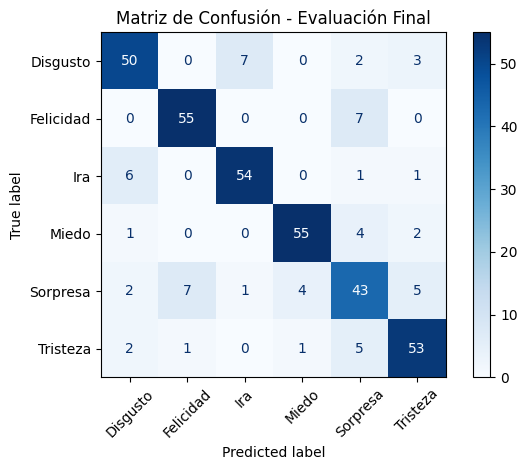

In [57]:
from datasets import Dataset, Features, Value, ClassLabel
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding
from evaluate import load
import torch
import numpy as np
import pandas as pd

# de nuevo cargamos dataset original
df = pd.read_csv("Nuevo_Dataset_Patrones_Emocionales.csv")

# dejamos las columnas de preguntas emocionales
columnas_emocionales = [col for col in df.columns if any(col.strip().startswith(f"{i}.") for i in range(1, 13))]
df = df.dropna(subset=columnas_emocionales, how='all')
df = df[df["Edad:"].between(10, 100)]  # eliminar edades atípicas

# Eborramos respuestas cortas
respuestas_irrelevantes = {"", ".", "nada", "ninguna", "ninguno", "no", "no sé", "na", "no recuerdo"}

def es_valida(fila):
    count_malas = 0
    for col in columnas_emocionales:
        texto = str(fila[col]).strip().lower()
        palabras = texto.split()
        if texto in respuestas_irrelevantes or len(palabras) < 3:
            count_malas += 1
    return count_malas < 3

df = df[df.apply(es_valida, axis=1)].copy()

# etiquetado
emociones = {
    "Felicidad": ["1.", "2."],
    "Tristeza": ["3.", "4."],
    "Disgusto": ["5.", "6."],
    "Ira": ["7.", "8."],
    "Miedo": ["9.", "10."],
    "Sorpresa": ["11.", "12."]
}

registros = []
for emocion, prefijos in emociones.items():
    columnas = [col for col in columnas_emocionales if any(col.strip().startswith(p) for p in prefijos)]
    for _, fila in df.iterrows():
        texto = " ".join(str(fila[col]) for col in columnas if pd.notnull(fila[col])).strip()
        if len(texto.split()) >= 3:
            registros.append({"texto": texto, "etiqueta": emocion})

df_individual = pd.DataFrame(registros)

# etiquetas a Id's
label_encoder = LabelEncoder()
df_individual["label_id"] = label_encoder.fit_transform(df_individual["etiqueta"])
class_names = label_encoder.classes_.tolist()

# dataset hugging face
features = Features({
    "texto": Value(dtype='string'),
    "label_id": ClassLabel(names=class_names)
})

dataset_hf = Dataset.from_pandas(df_individual[["texto", "label_id"]], features=features)
dataset_hf = dataset_hf.train_test_split(test_size=0.2, stratify_by_column="label_id", seed=42)

# tokenizacion con robertuito directamente
tokenizer = AutoTokenizer.from_pretrained("pysentimiento/robertuito-base-uncased")

def tokenizar(batch):
    return tokenizer(batch["texto"], padding="max_length", truncation=True, max_length=128)

tokenized_dataset = dataset_hf.map(tokenizar, batched=True)
tokenized_dataset = tokenized_dataset.rename_column("label_id", "labels")
tokenized_dataset.set_format("torch")

# =cargamos robertuito
num_labels = len(label_encoder.classes_)
model = AutoModelForSequenceClassification.from_pretrained("pysentimiento/robertuito-base-uncased", num_labels=num_labels)


accuracy = load("accuracy")
f1 = load("f1")
recall = load("recall")
precision = load("precision")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return {
        "accuracy": accuracy.compute(predictions=predictions, references=labels)["accuracy"],
        "f1_macro": f1.compute(predictions=predictions, references=labels, average="macro")["f1"],
        "recall_macro": recall.compute(predictions=predictions, references=labels, average="macro")["recall"],
        "precision_macro": precision.compute(predictions=predictions, references=labels, average="macro")["precision"],
    }

# argumentos con los que se entrenaran
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

training_args = TrainingArguments(
    output_dir="mejor_modelo_robertuito",  
    logging_strategy='epoch',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='f1_macro',
    num_train_epochs=8,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    weight_decay=0.1,
    warmup_steps=200,
    save_total_limit=1,
    logging_dir="./logs",
    report_to="none",
    fp16=True
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=compute_metrics,
)

# entrenamos
trainer.train()

# resultados
resultados = trainer.evaluate()
print("Resultados del modelo fine-tuned:", resultados)

# matroz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# predicciones del modelo sobre el conjunto test 
predictions = trainer.predict(tokenized_dataset["test"])

# obtenemos predicciones y resultados
y_true = predictions.label_ids
y_pred = predictions.predictions.argmax(axis=1)

nombres_clases = label_encoder.classes_

# crear y mostrar la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nombres_clases)

plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Matriz de Confusión - Evaluación Final")
plt.tight_layout()
plt.show()

trainer.save_model("mejor_modelo_robertuito")



Some weights of RobertaModel were not initialized from the model checkpoint at mejor_modelo_robertuito and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/lfre/robertuito_env/lib/python3.12/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Generando embeddings desde modelo fine-tuned...

--- KNN ---
Accuracy: 0.946236559139785
              precision    recall  f1-score   support

    Disgusto       0.98      0.89      0.93        62
   Felicidad       0.92      0.97      0.94        62
         Ira       0.91      0.97      0.94        62
       Miedo       0.95      1.00      0.98        62
    Sorpresa       0.95      0.90      0.93        62
    Tristeza       0.97      0.95      0.96        62

    accuracy                           0.95       372
   macro avg       0.95      0.95      0.95       372
weighted avg       0.95      0.95      0.95       372



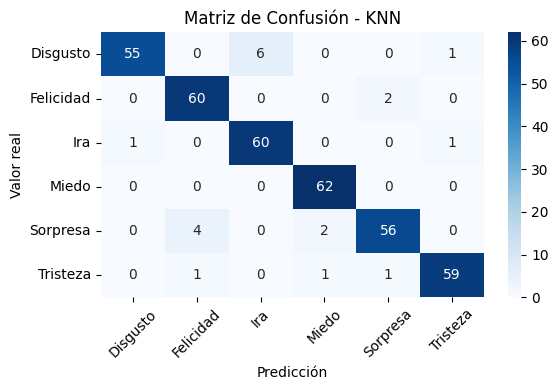


--- Naive Bayes (Gaussiano) ---
Accuracy: 0.9543010752688172
              precision    recall  f1-score   support

    Disgusto       0.97      0.94      0.95        62
   Felicidad       0.95      0.97      0.96        62
         Ira       0.95      0.94      0.94        62
       Miedo       0.98      0.98      0.98        62
    Sorpresa       0.88      0.95      0.91        62
    Tristeza       1.00      0.95      0.98        62

    accuracy                           0.95       372
   macro avg       0.96      0.95      0.95       372
weighted avg       0.96      0.95      0.95       372



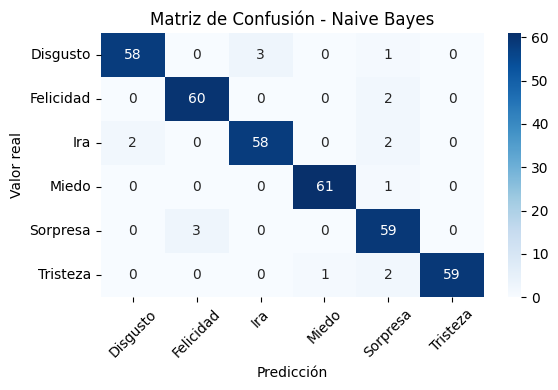


--- Árbol de Decisión (ID3) ---
Accuracy: 0.8978494623655914
              precision    recall  f1-score   support

    Disgusto       0.90      0.87      0.89        62
   Felicidad       0.94      0.95      0.94        62
         Ira       0.89      0.89      0.89        62
       Miedo       0.85      0.90      0.88        62
    Sorpresa       0.85      0.82      0.84        62
    Tristeza       0.97      0.95      0.96        62

    accuracy                           0.90       372
   macro avg       0.90      0.90      0.90       372
weighted avg       0.90      0.90      0.90       372



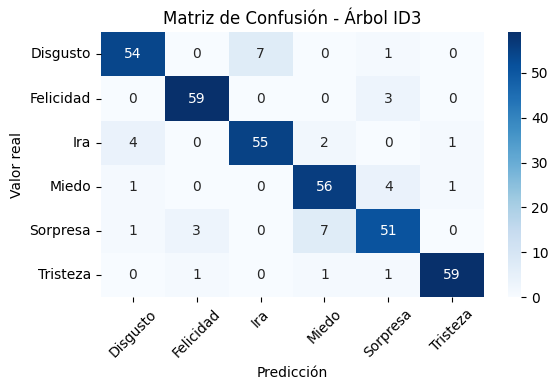


--- Árbol de Decisión (C4.5) ---
Accuracy: 0.8763440860215054
              precision    recall  f1-score   support

    Disgusto       0.88      0.84      0.86        62
   Felicidad       0.90      0.92      0.91        62
         Ira       0.88      0.92      0.90        62
       Miedo       0.85      0.85      0.85        62
    Sorpresa       0.83      0.77      0.80        62
    Tristeza       0.91      0.95      0.93        62

    accuracy                           0.88       372
   macro avg       0.88      0.88      0.88       372
weighted avg       0.88      0.88      0.88       372



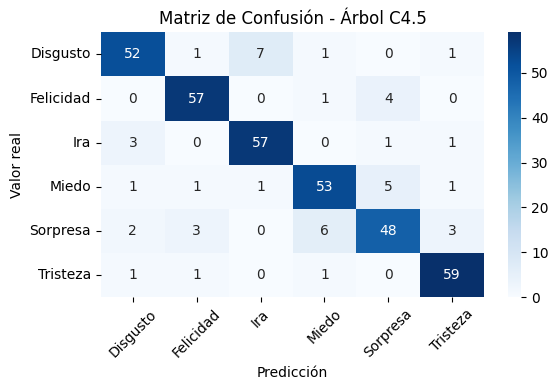


--- Random Forest ---
Accuracy: 0.956989247311828
              precision    recall  f1-score   support

    Disgusto       0.97      0.95      0.96        62
   Felicidad       0.95      0.97      0.96        62
         Ira       0.95      0.95      0.95        62
       Miedo       0.97      0.97      0.97        62
    Sorpresa       0.91      0.95      0.93        62
    Tristeza       1.00      0.95      0.98        62

    accuracy                           0.96       372
   macro avg       0.96      0.96      0.96       372
weighted avg       0.96      0.96      0.96       372



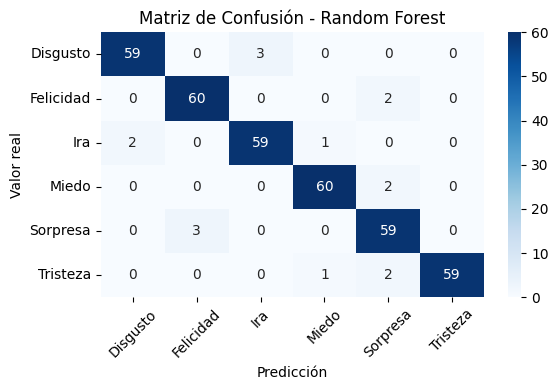


--- SVM ---
Accuracy: 0.9596774193548387
              precision    recall  f1-score   support

    Disgusto       0.94      0.97      0.95        62
   Felicidad       0.95      0.98      0.97        62
         Ira       0.97      0.94      0.95        62
       Miedo       0.98      0.97      0.98        62
    Sorpresa       0.92      0.95      0.94        62
    Tristeza       1.00      0.95      0.98        62

    accuracy                           0.96       372
   macro avg       0.96      0.96      0.96       372
weighted avg       0.96      0.96      0.96       372



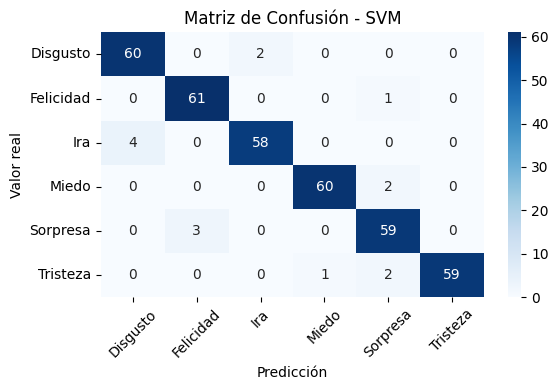

In [58]:
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

    #modelo fine-tuned y tokenizer ===
model = AutoModel.from_pretrained("mejor_modelo_robertuito", output_hidden_states=True)
tokenizer = AutoTokenizer.from_pretrained("pysentimiento/robertuito-base-uncased")
model.eval()

# === 2. Función para extraer embeddings CLS ===
def obtener_embedding_finetuned(texto):
    inputs = tokenizer(texto, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.hidden_states[-1][:, 0, :]  # CLS token
    return cls_embedding.squeeze().numpy()


# === 3. Extraer textos y etiquetas desde df_individual ===
textos = df_individual["texto"].tolist()
etiquetas = df_individual["etiqueta"].tolist()

# === 4. Generar embeddings ===
print("Generando embeddings desde modelo fine-tuned...")
embeddings = np.array([obtener_embedding_finetuned(t) for t in textos])

# === 5. Codificar etiquetas ===
le = LabelEncoder()
y = le.fit_transform(etiquetas)
etiquetas_unicas = le.classes_

# === 6. Dividir en train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, y, test_size=0.2, stratify=y, random_state=42
)

# === 7. Función para mostrar matriz de confusión ===
def plot_confusion_matrix(y_true, y_pred, titulo, etiquetas):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=etiquetas, yticklabels=etiquetas)
    plt.xlabel("Predicción")
    plt.ylabel("Valor real")
    plt.title(titulo)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# === 8. Modelos y evaluación ===

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\n--- KNN ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=etiquetas_unicas))
plot_confusion_matrix(y_test, y_pred_knn, "Matriz de Confusión - KNN", etiquetas_unicas)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("\n--- Naive Bayes (Gaussiano) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=etiquetas_unicas))
plot_confusion_matrix(y_test, y_pred_nb, "Matriz de Confusión - Naive Bayes", etiquetas_unicas)

# Árbol de Decisión ID3 (entropy)
id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3.fit(X_train, y_train)
y_pred_id3 = id3.predict(X_test)
print("\n--- Árbol de Decisión (ID3) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_id3))
print(classification_report(y_test, y_pred_id3, target_names=etiquetas_unicas))
plot_confusion_matrix(y_test, y_pred_id3, "Matriz de Confusión - Árbol ID3", etiquetas_unicas)

# Árbol de Decisión C4.5 (gini)
c45 = DecisionTreeClassifier(criterion='gini', random_state=42)
c45.fit(X_train, y_train)
y_pred_c45 = c45.predict(X_test)
print("\n--- Árbol de Decisión (C4.5) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_c45))
print(classification_report(y_test, y_pred_c45, target_names=etiquetas_unicas))
plot_confusion_matrix(y_test, y_pred_c45, "Matriz de Confusión - Árbol C4.5", etiquetas_unicas)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=etiquetas_unicas))
plot_confusion_matrix(y_test, y_pred_rf, "Matriz de Confusión - Random Forest", etiquetas_unicas)

# SVM
svm = SVC(C=1, gamma='scale', kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\n--- SVM ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=etiquetas_unicas))
plot_confusion_matrix(y_test, y_pred_svm, "Matriz de Confusión - SVM", etiquetas_unicas)


In [74]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import numpy as np

# === Definir el modelo SVM ===
svm_cv = SVC(C=1, gamma='scale', kernel='rbf')

# === Validación cruzada estratificada ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === Evaluar con accuracy como métrica ===
scores = cross_val_score(svm_cv, embeddings, y, cv=cv, scoring='accuracy')

# === Mostrar resultados ===
print("Accuracy en cada fold:", scores)
print("Accuracy promedio:", np.mean(scores))
print("Desviación estándar:", np.std(scores))


Accuracy en cada fold: [0.93817204 0.94086022 0.96774194 0.92741935 0.94623656]
Accuracy promedio: 0.9440860215053763
Desviación estándar: 0.01332205558426224


In [75]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import numpy as np

# === Definir el modelo SVM ===
svm_cv = SVC(C=1, gamma='scale', kernel='rbf')

# === Validación cruzada estratificada ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Evaluar con accuracy como métrica ===
scores = cross_val_score(svm_cv, embeddings, y, cv=cv, scoring='accuracy')

# === Mostrar resultados ===
print("Accuracy en cada fold:", scores)
print("Accuracy promedio:", np.mean(scores))
print("Desviación estándar:", np.std(scores))

Accuracy en cada fold: [0.93010753 0.94623656 0.9516129  0.93010753 0.98387097 0.95698925
 0.93548387 0.91935484 0.9516129  0.95698925]
Accuracy promedio: 0.946236559139785
Desviación estándar: 0.017504108167849176


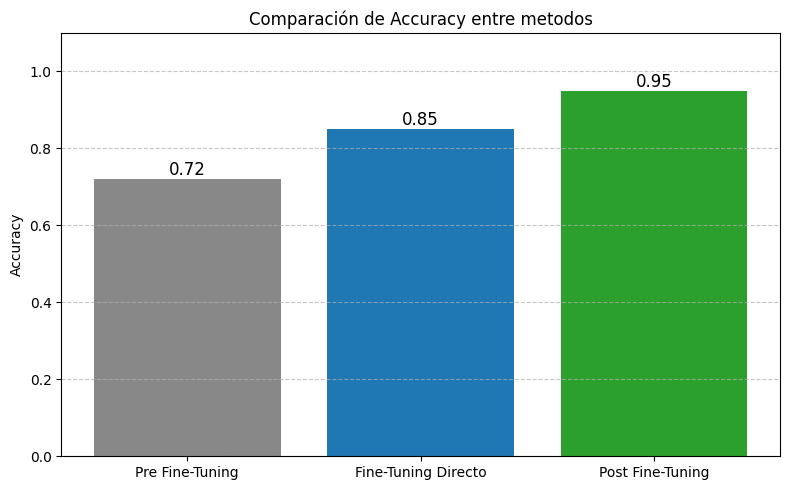

In [64]:
import matplotlib.pyplot as plt

# === 1. Definir resultados (usa tus propios valores reales aquí) ===
accuracy_pre_finetune = 0.72     # Ej: TF-IDF o embeddings sin fine-tune
accuracy_finetune_direct = 0.85  # Ej: trainer.evaluate()
accuracy_post_finetune = 0.95    # Ej: SVM o RF con embeddings post-finetune

# === 2. Preparar datos para graficar ===
etiquetas = ["Pre Fine-Tuning", "Fine-Tuning Directo", "Post Fine-Tuning"]
valores = [accuracy_pre_finetune, accuracy_finetune_direct, accuracy_post_finetune]

# === 3. Graficar ===
plt.figure(figsize=(8, 5))
bars = plt.bar(etiquetas, valores, color=["#888", "#1f77b4", "#2ca02c"])

# Añadir valores sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', fontsize=12)

plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.title("Comparación de Accuracy entre metodos")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [73]:
def predecir_emocion(texto, modelo, tokenizer, label_encoder):
    # Tokeniza y obtiene el embedding desde el modelo fine-tuned
    inputs = tokenizer(texto, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    embedding = outputs.hidden_states[-1][:, 0, :].squeeze().numpy()

    # Clasifica usando el modelo clásico elegido
    pred_id = modelo.predict([embedding])[0]

    # Convierte el ID de vuelta a la etiqueta de emoción
    emocion = label_encoder.inverse_transform([pred_id])[0]
    return emocion
nueva_frase = "Que agradable sorpresa el que hayas venido "
emocion_predicha = predecir_emocion(nueva_frase, svm, tokenizer, le)
print(f"Emoción predicha: {emocion_predicha}")


Emoción predicha: Felicidad


Este de aqui lo usamos para ver que parametros daban mejor resultado en fine tunning :D es extra no es importante en el codigo

In [48]:
from itertools import product
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification
import torch

# Parámetros a evaluar
learning_rates = [2e-5, 1e-5]
num_epochs = [8, 12]
batch_sizes = [8, 16]
weight_decays = [0.01, 0.1]

# Resultados guardados aquí
resultados_grid = []

# Iterar sobre todas las combinaciones
for lr, epochs, bs, wd in product(learning_rates, num_epochs, batch_sizes, weight_decays):
    print(f"\n Probando combinación: lr={lr}, epochs={epochs}, batch_size={bs}, weight_decay={wd}")

    # Volver a cargar el modelo limpio cada vez
    model = AutoModelForSequenceClassification.from_pretrained(
        "pysentimiento/robertuito-base-uncased",
        num_labels=num_labels
    ).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

    # Configurar los argumentos de entrenamiento
    training_args = TrainingArguments(
        output_dir = f"resultados/robertuito_lr{lr}_ep{epochs}_bs{bs}_wd{wd}".replace(".", ""),
        evaluation_strategy='epoch',
        save_strategy='epoch',
        logging_strategy='epoch',
        load_best_model_at_end=True,
        metric_for_best_model='f1_macro',
        num_train_epochs=epochs,
        per_device_train_batch_size=bs,
        per_device_eval_batch_size=bs,
        learning_rate=lr,
        weight_decay=wd,
        warmup_steps=200,
        save_total_limit=1,
        logging_dir="./logs",
        report_to="none",
        fp16=True
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_dataset["train"],
        eval_dataset=tokenized_dataset["test"],
        tokenizer=tokenizer,
        data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
        compute_metrics=compute_metrics
    )

    trainer.train()
    eval_result = trainer.evaluate()
    print(" Resultado:", eval_result)

    resultados_grid.append({
        "lr": lr,
        "epochs": epochs,
        "batch_size": bs,
        "weight_decay": wd,
        **eval_result
    })

# Mostrar mejores resultados ordenados por f1_macro
df_resultados = pd.DataFrame(resultados_grid)
df_resultados = df_resultados.sort_values(by="eval_f1_macro", ascending=False)
print("\n Mejores combinaciones por f1_macro:")
print(df_resultados[["lr", "epochs", "batch_size", "weight_decay", "eval_f1_macro", "eval_accuracy"]].head())



🔍 Probando combinación: lr=2e-05, epochs=8, batch_size=8, weight_decay=0.01


/home/lfre/robertuito_env/lib/python3.12/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pysentimiento/robertuito-base-uncased and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,Recall Macro,Precision Macro
1,1.628000,1.061370,0.663978,0.642450,0.663978,0.680361
2,0.709100,0.569681,0.784946,0.774294,0.784946,0.793846
3,0.308100,0.486915,0.836022,0.833176,0.836022,0.834929
4,0.125400,0.569798,0.825269,0.823466,0.825269,0.823961
5,0.048300,0.668528,0.838710,0.837087,0.838710,0.836987
6,0.015200,0.726675,0.836022,0.833734,0.836022,0.834359
7,0.005800,0.750668,0.833333,0.831831,0.833333,0.833001
8,0.004100,0.755929,0.827957,0.826519,0.827957,0.828277


📊 Resultado: {'eval_loss': 0.6685278415679932, 'eval_accuracy': 0.8387096774193549, 'eval_f1_macro': 0.8370869821092279, 'eval_recall_macro': 0.8387096774193549, 'eval_precision_macro': 0.8369874856943823, 'eval_runtime': 1.2643, 'eval_samples_per_second': 294.237, 'eval_steps_per_second': 37.175, 'epoch': 8.0}

🔍 Probando combinación: lr=2e-05, epochs=8, batch_size=8, weight_decay=0.1


/home/lfre/robertuito_env/lib/python3.12/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pysentimiento/robertuito-base-uncased and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,Recall Macro,Precision Macro
1,1.568400,0.960406,0.706989,0.685818,0.706989,0.737950
2,0.664600,0.550663,0.798387,0.790782,0.798387,0.797412
3,0.287800,0.521423,0.827957,0.825008,0.827957,0.828009
4,0.113800,0.587803,0.833333,0.831812,0.833333,0.833701
5,0.045400,0.683381,0.836022,0.835077,0.836022,0.834722
6,0.013400,0.740890,0.844086,0.842978,0.844086,0.844396
7,0.004200,0.774441,0.836022,0.835687,0.836022,0.837135
8,0.002900,0.782874,0.838710,0.838682,0.838710,0.840304


📊 Resultado: {'eval_loss': 0.740889847278595, 'eval_accuracy': 0.8440860215053764, 'eval_f1_macro': 0.8429784010592765, 'eval_recall_macro': 0.8440860215053764, 'eval_precision_macro': 0.8443955860316156, 'eval_runtime': 1.3269, 'eval_samples_per_second': 280.357, 'eval_steps_per_second': 35.421, 'epoch': 8.0}

🔍 Probando combinación: lr=2e-05, epochs=8, batch_size=16, weight_decay=0.01


/home/lfre/robertuito_env/lib/python3.12/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pysentimiento/robertuito-base-uncased and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,Recall Macro,Precision Macro
1,1.741700,1.563478,0.556452,0.537232,0.556452,0.552905
2,1.186900,0.779799,0.741935,0.725194,0.741935,0.738705
3,0.576100,0.561172,0.795699,0.785104,0.795699,0.793184
4,0.301600,0.518353,0.833333,0.831335,0.833333,0.833333
5,0.150100,0.523969,0.833333,0.831998,0.833333,0.834354
6,0.068100,0.606883,0.827957,0.822981,0.827957,0.827657
7,0.032500,0.616406,0.849462,0.847737,0.849462,0.848675
8,0.021400,0.622687,0.841398,0.839682,0.841398,0.839822


📊 Resultado: {'eval_loss': 0.6164055466651917, 'eval_accuracy': 0.8494623655913979, 'eval_f1_macro': 0.8477374260708297, 'eval_recall_macro': 0.8494623655913979, 'eval_precision_macro': 0.8486749651145743, 'eval_runtime': 1.2333, 'eval_samples_per_second': 301.626, 'eval_steps_per_second': 19.46, 'epoch': 8.0}

🔍 Probando combinación: lr=2e-05, epochs=8, batch_size=16, weight_decay=0.1


/home/lfre/robertuito_env/lib/python3.12/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pysentimiento/robertuito-base-uncased and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,Recall Macro,Precision Macro
1,1.741700,1.563337,0.556452,0.537232,0.556452,0.552905
2,1.186700,0.779695,0.741935,0.725194,0.741935,0.738705
3,0.576100,0.561223,0.795699,0.785017,0.795699,0.792647
4,0.301600,0.518556,0.833333,0.831335,0.833333,0.833333
5,0.150100,0.523836,0.830645,0.829537,0.830645,0.831619
6,0.068100,0.606387,0.827957,0.822981,0.827957,0.827657
7,0.032500,0.615155,0.852151,0.850390,0.852151,0.851480
8,0.021200,0.620694,0.844086,0.842711,0.844086,0.842835


📊 Resultado: {'eval_loss': 0.615155041217804, 'eval_accuracy': 0.8521505376344086, 'eval_f1_macro': 0.8503895305397281, 'eval_recall_macro': 0.8521505376344085, 'eval_precision_macro': 0.8514797011394188, 'eval_runtime': 1.2682, 'eval_samples_per_second': 293.33, 'eval_steps_per_second': 18.924, 'epoch': 8.0}

🔍 Probando combinación: lr=2e-05, epochs=12, batch_size=8, weight_decay=0.01


/home/lfre/robertuito_env/lib/python3.12/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pysentimiento/robertuito-base-uncased and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,Recall Macro,Precision Macro
1,1.568400,0.960326,0.706989,0.685818,0.706989,0.737950
2,0.663600,0.548404,0.798387,0.790782,0.798387,0.797412
3,0.284300,0.515616,0.825269,0.824016,0.825269,0.825095
4,0.109600,0.605098,0.830645,0.829417,0.830645,0.831005
5,0.038000,0.720333,0.841398,0.841382,0.841398,0.841763
6,0.007900,0.800890,0.841398,0.840981,0.841398,0.842168
7,0.002000,0.860046,0.841398,0.840294,0.841398,0.844008
8,0.001200,0.863496,0.841398,0.841249,0.841398,0.842686
9,0.001000,0.918522,0.846774,0.846970,0.846774,0.850254
10,0.000900,0.919963,0.838710,0.838299,0.838710,0.840242


📊 Resultado: {'eval_loss': 0.91852205991745, 'eval_accuracy': 0.8467741935483871, 'eval_f1_macro': 0.8469698007200622, 'eval_recall_macro': 0.8467741935483871, 'eval_precision_macro': 0.850254190672506, 'eval_runtime': 1.3005, 'eval_samples_per_second': 286.045, 'eval_steps_per_second': 36.14, 'epoch': 12.0}

🔍 Probando combinación: lr=2e-05, epochs=12, batch_size=8, weight_decay=0.1


/home/lfre/robertuito_env/lib/python3.12/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pysentimiento/robertuito-base-uncased and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,Recall Macro,Precision Macro
1,1.552300,0.960037,0.693548,0.677231,0.693548,0.729319
2,0.671400,0.546538,0.798387,0.791556,0.798387,0.802878
3,0.294100,0.499198,0.822581,0.819810,0.822581,0.826287
4,0.117000,0.611903,0.819892,0.819690,0.819892,0.824808
5,0.033200,0.757792,0.841398,0.839766,0.841398,0.846800
6,0.009500,0.808044,0.822581,0.819409,0.822581,0.824199
7,0.003300,0.869942,0.822581,0.821230,0.822581,0.828394
8,0.001300,0.847277,0.833333,0.830876,0.833333,0.834287
9,0.001100,0.900861,0.822581,0.820566,0.822581,0.827914
10,0.000900,0.900932,0.822581,0.821227,0.822581,0.825017


📊 Resultado: {'eval_loss': 0.7577922940254211, 'eval_accuracy': 0.8413978494623656, 'eval_f1_macro': 0.839765531664107, 'eval_recall_macro': 0.8413978494623656, 'eval_precision_macro': 0.8467997609691982, 'eval_runtime': 1.2353, 'eval_samples_per_second': 301.149, 'eval_steps_per_second': 38.048, 'epoch': 12.0}

🔍 Probando combinación: lr=2e-05, epochs=12, batch_size=16, weight_decay=0.01


/home/lfre/robertuito_env/lib/python3.12/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pysentimiento/robertuito-base-uncased and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,Recall Macro,Precision Macro
1,1.732100,1.534584,0.556452,0.540936,0.556452,0.551482
2,1.191600,0.778749,0.763441,0.750564,0.763441,0.774797
3,0.586900,0.536889,0.814516,0.806992,0.814516,0.815671
4,0.305300,0.513466,0.825269,0.824282,0.825269,0.828571


KeyboardInterrupt: 